In [1]:
from spont_syn_detector_utility import *
from spont_syn_suite2p_utility import *
from spont_syn_analysis_utility import *
from spont_syn_plotting_utility import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import pynapple as nap
import scipy.stats as stats
import os
import pickle
import dabest

In [2]:
%matplotlib inline

In [3]:
global_experiment_structure = {
    "control": {
        "DIV16_cs2_r1": [f"DIV16_cs2_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV16_cs3_r1":[f"DIV16_cs3_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_r1": [f"DIV17_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs6_r1":[f"DIV17_cs6_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs4_r1":[f"DIV17_cs4_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs3_r2":[f"DIV17_cs3_r2_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r1":[f"DIV18_cs2_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
#         "DIV18_cs2_r2":[f"DIV18_cs2_r2_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r3":[f"DIV18_cs2_r3_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r1":[f"DIV18_cs3_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
#         "DIV18_cs3_r2":[f"DIV18_cs3_r2_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r3":[f"DIV18_cs3_r3_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs4_r1":[f"DIV18_cs4_r1_baselineDur420sInt550msBin550ms_filtered.pkl"],
#         "DIV18_cs4_r2":[f"DIV18_cs4_r2_baselineDur420sInt550msBin550ms_filtered.pkl"]
    },
    
    "PDBu": { 
        "DIV17_r1": [f"DIV17_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs6_r1":[f"DIV17_cs6_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs4_r1":[f"DIV17_cs4_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r1":[f"DIV18_cs2_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r3":[f"DIV18_cs2_r3_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r1":[f"DIV18_cs3_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r3":[f"DIV18_cs3_r3_PDBuDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs4_r1":[f"DIV18_cs4_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"],
          
    },
    "APV": {
        "DIV16_cs2_r1": [f"DIV16_cs2_r1_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs4_r1":[f"DIV17_cs4_r1_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs3_r2":[f"DIV17_cs3_r2_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r2":[f"DIV18_cs2_r2_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r3":[f"DIV18_cs2_r3_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r2":[f"DIV18_cs3_r2_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r3":[f"DIV18_cs3_r3_APVDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs4_r2":[f"DIV18_cs4_r2_APVDur420sInt550msBin550ms_filtered.pkl"]
    },
    "CNQX": {
        "DIV16_cs3_r1":[f"DIV16_cs3_r1_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs3_r2":[f"DIV17_cs3_r2_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV17_cs6_r1":[f"DIV17_cs6_r1_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r1":[f"DIV18_cs2_r1_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r1":[f"DIV18_cs3_r1_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs4_r1":[f"DIV18_cs4_r1_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs2_r2":[f"DIV18_cs2_r2_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r2":[f"DIV18_cs3_r2_CNQXDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs4_r2":[f"DIV18_cs4_r2_CNQXDur420sInt550msBin550ms_filtered.pkl"]
    },
    "Potentiated":{
        "DIV18_cs2_r2":[f"DIV18_cs2_r2_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs3_r2":[f"DIV18_cs3_r2_baselineDur420sInt550msBin550ms_filtered.pkl"],
        "DIV18_cs4_r2":[f"DIV18_cs4_r2_baselineDur420sInt550msBin550ms_filtered.pkl"]
        
    }
        
}

In [4]:
experiment_cell_stats, experiment_binned_stats = build_experiment_dfs(r"C:\Users\jcbeg\Code\JupyterNotebooks\Calcium_Imaging\spont_syn_process\process_3_manual", global_experiment_structure)

In [5]:
experiment_binned_stats

,Bin_Limits,Spikes,Frequency,group,dataset,file_name
0,"(0.0, 0.55)",0,0.000000,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
1,"(0.55, 1.1)",7,12.727273,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
2,"(1.1, 1.6500000000000001)",10,18.181818,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
3,"(1.6500000000000001, 2.2)",3,5.454545,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
4,"(2.2, 2.75)",8,14.545455,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
...,...,...,...,...,...,...
759,"(417.45000000000005, 418.00000000000006)",0,0.000000,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...
760,"(418.00000000000006, 418.55)",0,0.000000,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...
761,"(418.55, 419.1)",0,0.000000,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...
762,"(419.1, 419.65000000000003)",0,0.000000,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...


In [ ]:
bin_cs = experiment_binned_stats.groupby(['dataset','group'])
print(bin_cs["Spikes"])

In [5]:
cs = experiment_cell_stats

In [6]:
filtered = cs[cs["SpikesCount"]!=1]
filtered
final_df = filtered[filtered["SpikesCount"]!=0]
final_df

,NeuronId,IsUsed,Skew,SpikesTimes,Amplitudes,Total Frames,SpikesCount,SpikesFreq,SpikesDiff,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,group,dataset,file_name
0,0,True,14.589741,"[12.65, 54.45, 68.75]","[219.0, 11.0, 37.0]",266,3,0.020506,"[41.800000000000004, 14.299999999999997]",28.050000,28.050,69.324194,89.000000,37.0,127.338621,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
2,2,True,10.097655,"[18.700000000000003, 35.75, 45.650000000000006...","[159.0, 19.0, 33.0, 54.0, 20.0, 33.0, 19.0, 17.0]",266,8,0.054682,"[17.049999999999997, 9.900000000000006, 21.450...",15.792857,17.050,63.255206,44.250000,26.5,108.452715,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
6,6,True,5.384538,"[10.450000000000001, 28.6, 39.6, 45.6500000000...","[35.0, 113.0, 116.0, 113.0, 84.0]",266,5,0.034176,"[18.15, 11.0, 6.050000000000004, 69.3]",26.125000,14.575,111.803812,92.200000,113.0,37.457146,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
8,8,True,4.658661,"[29.150000000000002, 60.50000000000001, 65.45,...","[61.0, 28.0, 70.0, 36.0, 26.0, 47.0, 15.0, 11....",266,9,0.061517,"[31.350000000000005, 4.949999999999996, 4.9500...",10.106250,6.600,100.177348,34.444444,28.0,60.813938,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
9,9,True,8.065749,"[2.2, 52.800000000000004, 54.45, 78.1000000000...","[9.0, 13.0, 12.0, 36.0, 114.0, 50.0]",266,6,0.041012,"[50.6, 1.6499999999999986, 23.650000000000006,...",21.010000,15.400,87.165306,39.000000,24.5,102.947999,control,DIV16_cs2_r1,DIV16_cs2_r1_baselineDur420sInt550msBin550ms_f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,944,True,2.098754,"[6.050000000000001, 36.300000000000004]","[10.0, 11.0]",259,2,0.014040,[30.250000000000004],30.250000,30.250,NaN,10.500000,10.5,6.734350,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...
945,945,True,4.698546,"[44.0, 99.55000000000001]","[12.0, 10.0]",259,2,0.014040,[55.55000000000001],55.550000,55.550,NaN,11.000000,11.0,12.856487,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...
946,946,True,6.873106,"[101.2, 133.65]","[11.0, 18.0]",259,2,0.014040,[32.45],32.450000,32.450,NaN,14.500000,14.5,34.136189,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...
947,947,True,2.620519,"[38.5, 86.35000000000001]","[18.0, 10.0]",259,2,0.014040,[47.85000000000001],47.850000,47.850,NaN,14.000000,14.0,40.406102,Potentiated,DIV18_cs4_r2,DIV18_cs4_r2_baselineDur420sInt550msBin550ms_f...


In [10]:
lst = [331,331,227,227,348,348,348,303,303,303,180,180,180,366,366,291,291,291,850,850,850,51,51,313,313,313,252,252,252,64,64,64,196,196,196,707,707,707]
arr = np.array(lst)

In [7]:
puncta = final_df.groupby('dataset')['group'].value_counts().reset_index(name='synapse_count')
# opt2 = final_df.groupby( [ "dataset", "group"] ).size().to_frame(name = 'count').reset_index()
puncta

,dataset,group,synapse_count
0,DIV16_cs2_r1,control,331
1,DIV16_cs2_r1,APV,3
2,DIV16_cs3_r1,CNQX,411
3,DIV16_cs3_r1,control,227
4,DIV17_cs3_r2,control,348
5,DIV17_cs3_r2,CNQX,66
6,DIV17_cs3_r2,APV,2
7,DIV17_cs4_r1,PDBu,765
8,DIV17_cs4_r1,control,303
9,DIV17_cs4_r1,APV,9


In [8]:
final_df['total_count'] = final_df.groupby('dataset')['group'].transform(len)


In [9]:
coverslip_df

NameError: name 'coverslip_df' is not defined

In [9]:
# OG grouping method to make the graphs that I made, want to also include standard deviation
event_df = final_df.groupby(['dataset','group'],as_index=False).apply(lambda x: x.sum())
coverslip_df = final_df.groupby(['dataset','group'],as_index=False).apply(lambda x: x.mean())
coverslip_df['synapse_count'] = puncta['synapse_count']
coverslip_df['max_syn'] =arr
coverslip_df['SpikesCount'] = event_df['SpikesCount']
coverslip_df['normalized_freq'] = (coverslip_df['synapse_count']  *  coverslip_df['SpikesFreq']) / coverslip_df['max_syn']
# coverslip_df['normalized_amp'] = coverslip_df['AvgAmplitude']  *  coverslip_df['synapse_count']
coverslip_df = coverslip_df.set_index(['dataset','group'])

NameError: name 'arr' is not defined

In [12]:
coverslip_df

NeuronId  IsUsed      Skew  Total Frames  \
dataset      group                                                     
DIV16_cs2_r1 APV           16.333333     1.0  5.677776         389.0   
             control      285.425982     1.0  5.968315         266.0   
DIV16_cs3_r1 CNQX         289.413625     1.0  7.147604         345.0   
             control      195.757709     1.0  6.577092         296.0   
DIV17_cs3_r2 APV           14.500000     1.0  3.696412         244.0   
             CNQX          65.272727     1.0  6.651686         254.0   
             control      264.704023     1.0  4.950186         266.0   
DIV17_cs4_r1 APV           38.888889     1.0  3.902422         246.0   
             PDBu         465.684967     1.0  5.596013         258.0   
             control      223.617162     1.0  6.283277         260.0   
DIV17_cs6_r1 CNQX         100.171429     1.0  6.951634         313.0   
             PDBu         176.364486     1.0  5.684824         195.0   
             control      167.266667     1.0  7.025088         256.0   
DIV17_r1     PDBu         409.957929     1.0  5.094742         357.0   
             control      282.915301     1.0  6.319619         297.0   
DIV18_cs2_r1 CNQX          92.041237     1.0  6.965655         255.0   
             PDBu         148.182292     1.0  6.359966         255.0   
             control      211.443299     1.0  6.408904         254.0   
DIV18_cs2_r2 APV           70.333333     1.0  5.763983         225.0   
             CNQX         234.572549     1.0  7.700900         280.0   
             Potentiated  547.736471     1.0  6.172591         259.0   
DIV18_cs2_r3 PDBu         195.436293     1.0  6.905691         294.0   
             control       85.666667     1.0  6.887286         205.0   
DIV18_cs3_r1 CNQX         168.021583     1.0  6.012755         228.0   
             PDBu         265.575931     1.0  6.517925         251.0   
             control      279.600639     1.0  6.446816         254.0   
DIV18_cs3_r2 APV           19.800000     1.0  3.901440         253.0   
             CNQX         116.946809     1.0  6.854122         257.0   
             Potentiated  216.968254     1.0  6.229366         254.0   
DIV18_cs3_r3 APV           21.750000     1.0  4.101609         212.0   
             PDBu         231.327485     1.0  6.192164         242.0   
             control       93.406250     1.0  7.071943         201.0   
DIV18_cs4_r1 CNQX          94.786325     1.0  6.526257         258.0   
             PDBu         125.102564     1.0  5.132320         235.0   
             control      181.561224     1.0  5.770166         271.0   
DIV18_cs4_r2 APV            8.666667     1.0  5.469806         242.0   
             CNQX         168.000000     1.0  6.253671         263.0   
             Potentiated  443.797737     1.0  5.672140         259.0   

                          SpikesCount  SpikesFreq    DiffAvg  DiffMedian  \
dataset      group                                                         
DIV16_cs2_r1 APV                    9    0.014022   3.208333    3.116667   
             control             1354    0.027961  29.950523   27.613822   
DIV16_cs3_r1 CNQX                1721    0.022068  42.514824   39.683637   
             control              856    0.023163  39.708780   38.192291   
DIV17_cs3_r2 APV                    8    0.029806   1.430000    1.375000   
             CNQX                 200    0.021692  27.762285   27.254167   
             control             1752    0.034412  30.819207   28.348707   
DIV17_cs4_r1 APV                   44    0.036134  10.348448    9.838889   
             PDBu                4815    0.044356  25.918440   23.624477   
             control             1404    0.032403  30.793221   29.090099   
DIV17_cs6_r1 CNQX                 217    0.018008  35.905852   35.357143   
             PDBu                 792    0.034508  24.764825   23.655140   
             control              597    0.023556  39.222065   37.193750   
DIV17_r

In [16]:
new_df = pd.DataFrame()
new_df['freq'] = coverslip_df["SpikesFreq"]
new_df['amp'] = coverslip_df['AvgAmplitude']
new_df['norm'] = coverslip_df['normalized_freq']
new_df.set_index(coverslip_df.index)

new_df.to_csv('final_stats.csv')

In [33]:
coverslip_df

NeuronId  IsUsed      Skew  Total Frames  \
dataset      group                                                     
DIV16_cs2_r1 APV           16.333333     1.0  5.677776         389.0   
             control      285.425982     1.0  5.968315         266.0   
DIV16_cs3_r1 CNQX         289.413625     1.0  7.147604         345.0   
             control      195.757709     1.0  6.577092         296.0   
DIV17_cs3_r2 APV           14.500000     1.0  3.696412         244.0   
             CNQX          65.272727     1.0  6.651686         254.0   
             control      264.704023     1.0  4.950186         266.0   
DIV17_cs4_r1 APV           38.888889     1.0  3.902422         246.0   
             PDBu         465.684967     1.0  5.596013         258.0   
             control      223.617162     1.0  6.283277         260.0   
DIV17_cs6_r1 CNQX         100.171429     1.0  6.951634         313.0   
             PDBu         176.364486     1.0  5.684824         195.0   
             control      167.266667     1.0  7.025088         256.0   
DIV17_r1     PDBu         409.957929     1.0  5.094742         357.0   
             control      282.915301     1.0  6.319619         297.0   
DIV18_cs2_r1 CNQX          92.041237     1.0  6.965655         255.0   
             PDBu         148.182292     1.0  6.359966         255.0   
             control      211.443299     1.0  6.408904         254.0   
DIV18_cs2_r2 APV           70.333333     1.0  5.763983         225.0   
             CNQX         234.572549     1.0  7.700900         280.0   
             Potentiated  547.736471     1.0  6.172591         259.0   
DIV18_cs2_r3 PDBu         195.436293     1.0  6.905691         294.0   
             control       85.666667     1.0  6.887286         205.0   
DIV18_cs3_r1 CNQX         168.021583     1.0  6.012755         228.0   
             PDBu         265.575931     1.0  6.517925         251.0   
             control      279.600639     1.0  6.446816         254.0   
DIV18_cs3_r2 APV           19.800000     1.0  3.901440         253.0   
             CNQX         116.946809     1.0  6.854122         257.0   
             Potentiated  216.968254     1.0  6.229366         254.0   
DIV18_cs3_r3 APV           21.750000     1.0  4.101609         212.0   
             PDBu         231.327485     1.0  6.192164         242.0   
             control       93.406250     1.0  7.071943         201.0   
DIV18_cs4_r1 CNQX          94.786325     1.0  6.526257         258.0   
             PDBu         125.102564     1.0  5.132320         235.0   
             control      181.561224     1.0  5.770166         271.0   
DIV18_cs4_r2 APV            8.666667     1.0  5.469806         242.0   
             CNQX         168.000000     1.0  6.253671         263.0   
             Potentiated  443.797737     1.0  5.672140         259.0   

                          SpikesCount  SpikesFreq    DiffAvg  DiffMedian  \
dataset      group                                                         
DIV16_cs2_r1 APV                    9    0.014022   3.208333    3.116667   
             control             1354    0.027961  29.950523   27.613822   
DIV16_cs3_r1 CNQX                1721    0.022068  42.514824   39.683637   
             control              856    0.023163  39.708780   38.192291   
DIV17_cs3_r2 APV                    8    0.029806   1.430000    1.375000   
             CNQX                 200    0.021692  27.762285   27.254167   
             control             1752    0.034412  30.819207   28.348707   
DIV17_cs4_r1 APV                   44    0.036134  10.348448    9.838889   
             PDBu                4815    0.044356  25.918440   23.624477   
             control             1404    0.032403  30.793221   29.090099   
DIV17_cs6_r1 CNQX                 217    0.018008  35.905852   35.357143   
             PDBu                 792    0.034508  24.764825   23.655140   
             control              597    0.023556  39.222065   37.193750   
DIV17_r

In [115]:
agg_df = final_df.groupby(['dataset', 'group'], as_index = False).agg({"SpikesCount": ['sum'],
                                            'Total Frames': ['mean'],
                                            'SpikesFreq': ['mean', 'std', 'max', 'min'],
                                            'AvgAmplitude': ['mean', 'std', 'max', 'min'],
                                                                      ''})

In [161]:
coverslip_df['synapse_count']

dataset       group      
DIV16_cs2_r1  APV              3
              control        331
DIV16_cs3_r1  CNQX           411
              control        227
DIV17_cs3_r2  APV              2
              CNQX            66
              control        348
DIV17_cs4_r1  APV              9
              PDBu           765
              control        303
DIV17_cs6_r1  CNQX            70
              PDBu           214
              control        180
DIV17_r1      PDBu           618
              control        366
DIV18_cs2_r1  CNQX            97
              PDBu           192
              control        291
DIV18_cs2_r2  APV              6
              CNQX           255
              Potentiated    850
DIV18_cs2_r3  PDBu           259
              control         51
DIV18_cs3_r1  CNQX           139
              PDBu           349
              control        313
DIV18_cs3_r2  APV              5
              CNQX            94
              Potentiated    252
DIV18_cs3_r3  APV

In [224]:
control_PDBu_df

SpikesCount Total Frames SpikesFreq            \
                             sum         mean       mean       std   
dataset      group                                                   
DIV16_cs2_r1 control        1354        266.0   0.027961  0.015419   
DIV16_cs3_r1 control         856        296.0   0.023163  0.016211   
DIV17_cs3_r2 control        1752        266.0   0.034412  0.024066   
DIV17_cs4_r1 PDBu           4815        258.0   0.044356  0.034847   
             control        1404        260.0   0.032403  0.027810   
DIV17_cs6_r1 PDBu            792        195.0   0.034508  0.023446   
             control         597        256.0   0.023556  0.013355   
DIV17_r1     PDBu           5322        357.0   0.043859  0.035271   
             control        2129        297.0   0.035610  0.031459   
DIV18_cs2_r1 PDBu            670        255.0   0.024881  0.015094   
             control        1791        254.0   0.044056  0.030746   
DIV18_cs2_r3 PDBu           1293        294.0   0.030874  0.024357   
             control         148        205.0   0.025738  0.014762   
DIV18_cs3_r1 PDBu           1469        251.0   0.030490  0.019707   
             control        1556        254.0   0.035585  0.027236   
DIV18_cs3_r3 PDBu            679        242.0   0.029833  0.019275   
             control         207        201.0   0.029257  0.026025   
DIV18_cs4_r1 PDBu            407        235.0   0.026914  0.015055   
             control         906        271.0   0.031013  0.019810   

                     AvgAmplitude             
                             mean        std  
dataset      group                            
DIV16_cs2_r1 control    29.433670  14.486062  
DIV16_cs3_r1 control    20.515980   8.178091  
DIV17_cs3_r2 control    17.837208   7.319849  
DIV17_cs4_r1 PDBu       20.217532   6.387774  
             control    22.737715   8.614726  
DIV17_cs6_r1 PDBu       19.919471   7.206907  
             control    22.753422   9.679701  
DIV17_r1     PDBu       19.755052   6.658128  
             control    21.893479   8.740199  
DIV18_cs2_r1 PDBu       20.971783   9.523465  
             control    31.370833  20.353142  
DIV18_cs2_r3 PDBu       22.975503   9.144239  
             control    23.274287   9.194637  
DIV18_cs3_r1 PDBu       20.641884   8.230794  
             control    24.467368   9.779180  
DIV18_cs3_r3 PDBu       23.197446   8.906319  
             control    25.073653  12.492574  
DIV18_cs4_r1 PDBu       16.090799   5.274125  
             control    18.762665   6.434444

In [13]:
control_PDBu_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['control', 'PDBu'])]
_PDBu_df = control_PDBu_df.drop(['DIV16_cs2_r1',"DIV16_cs3_r1","DIV17_cs3_r2","DIV18_cs2_r1",
                                     "DIV18_cs3_r1","DIV18_cs4_r1"])
_PDBu_df=_PDBu_df.reset_index(level=1)
_PDBu_df=_PDBu_df.reset_index(level=0)
_PDBu_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,total_count,synapse_count,max_syn,normalized_freq
0,DIV17_cs4_r1,PDBu,465.684967,1.0,5.596013,258.0,4815,0.044356,25.918440,23.624477,79.790750,20.217532,18.550327,41.505953,1077.0,303,303,0.044356
1,DIV17_cs4_r1,control,223.617162,1.0,6.283277,260.0,1404,0.032403,30.793221,29.090099,78.744148,22.737715,21.386139,42.544468,1077.0,9,303,0.000962
2,DIV17_cs6_r1,PDBu,176.364486,1.0,5.684824,195.0,792,0.034508,24.764825,23.655140,77.113683,19.919471,18.901869,39.165333,464.0,180,180,0.034508
3,DIV17_cs6_r1,control,167.266667,1.0,7.025088,256.0,597,0.023556,39.222065,37.193750,76.894627,22.753422,21.644444,41.441276,464.0,70,180,0.009161
4,DIV17_r1,PDBu,409.957929,1.0,5.094742,357.0,5322,0.043859,27.450459,24.107888,83.167499,19.755052,17.791262,43.275763,984.0,618,366,0.074056
5,DIV17_r1,control,282.915301,1.0,6.319619,297.0,2129,0.035610,31.583501,28.569194,82.722728,21.893479,20.064208,43.704714,984.0,366,366,0.035610
6,DIV18_cs2_r3,PDBu,195.436293,1.0,6.905691,294.0,1293,0.030874,31.345425,29.382529,75.238117,22.975503,20.731660,46.339133,310.0,259,51,0.156790
7,DIV18_cs2_r3,control,85.666667,1.0,6.887286,205.0,148,0.025738,24.362458,23.472059,74.594778,23.274287,21.637255,41.976429,310.0,51,51,0.025738
8,DIV18_cs3_r3,PDBu,231.327485,1.0,6.192164,242.0,679,0.029833,28.249728,26.832602,82.389558,23.197446,21.315789,49.182408,239.0,64,64,0.029833
9,DIV18_cs3_r3,control,93.406250,1.0,7.071943,201.0,207,0.029257,25.998019,24.788672,82.459472,25.073653,23.492188,41.536289,239.0,4,64,0.001829


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,PDBu,5,5,mean difference,True,0.007373,95,0.003022,0.010271,0.0,0.0625,0.0,0.023574,-3.560582


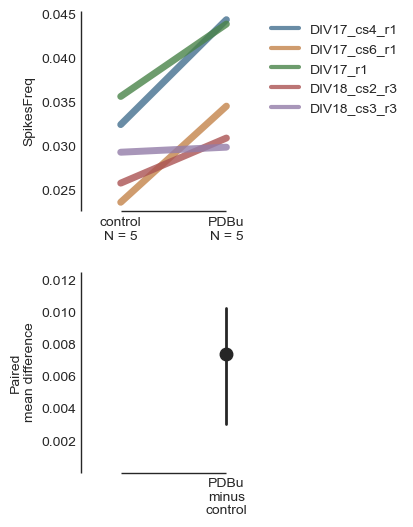

In [41]:
PDBu_change = dabest.load(data=_PDBu_df, x = 'group', y='SpikesFreq', idx = ("control", "PDBu"), paired=True,
                         id_col='dataset')
plt.style.use("seaborn-white")
PDBu_change.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\PDBU_amp.png',
#            bbox_inches='tight')
PDBu_change.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,PDBu,5,5,mean difference,True,-1.93351,95,-2.506586,-0.929753,0.067,0.0625,0.0,0.011746,4.394011


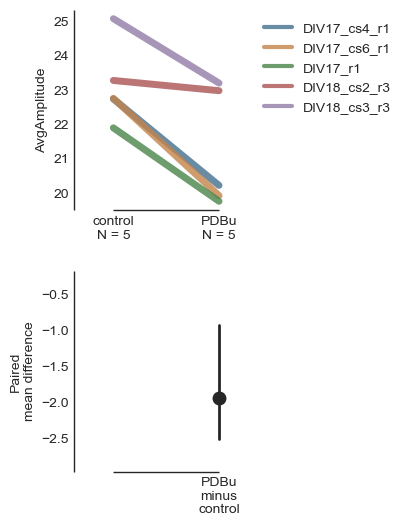

In [17]:
PDBu_amp = dabest.load(data=_PDBu_df, x = 'group', y='AvgAmplitude', idx = ("control", "PDBu"), paired=True,
                         id_col='dataset')

PDBu_amp.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
PDBu_amp.mean_diff.statistical_tests

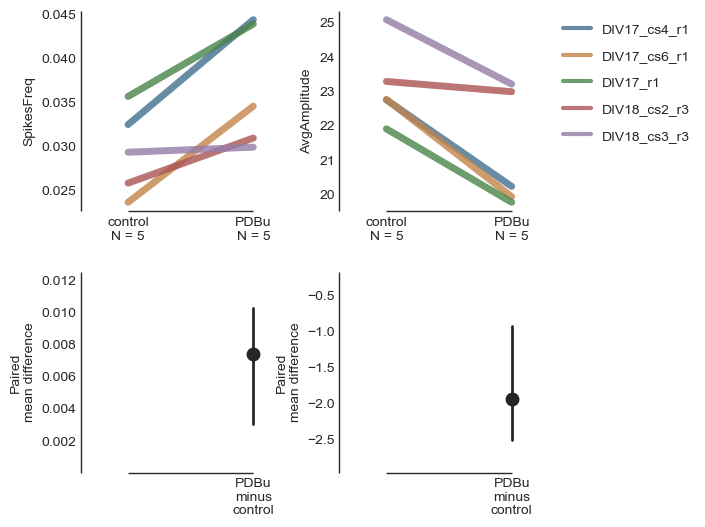

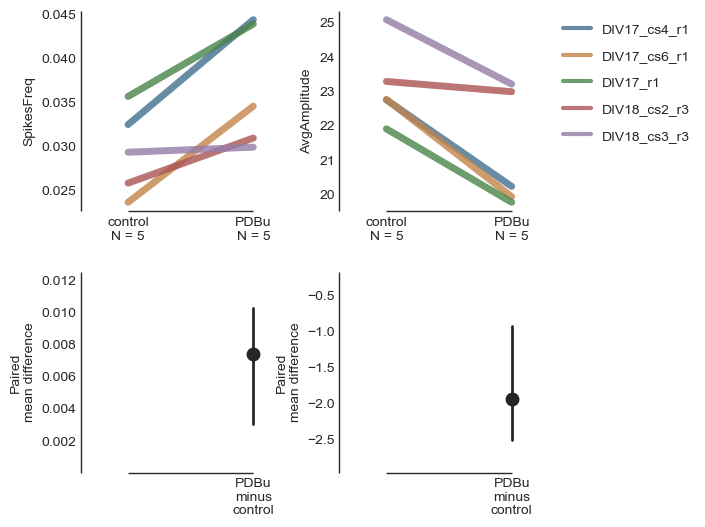

In [39]:
fig, axx = plt.subplots(nrows =1, ncols=2,
                      figsize = (6,6),gridspec_kw={'wspace': 0.25})
PDBu_change.mean_diff.plot(ax=axx.flat[0],float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
axx[0].get_legend().remove()
PDBu_amp.mean_diff.plot(ax=axx.flat[1], float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8},legend_kwargs = {'loc': 'best', 'labelspacing':1.0, 'markerscale': 100.0})
# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\PDBU_effect_size.png',
#            bbox_inches='tight')

In [36]:
control_CNQX_df

NeuronId  IsUsed      Skew  Total Frames  \
dataset      group                                                     
DIV16_cs2_r1 control      285.425982     1.0  5.968315         266.0   
DIV16_cs3_r1 CNQX         289.413625     1.0  7.147604         345.0   
             control      195.757709     1.0  6.577092         296.0   
DIV17_cs3_r2 CNQX          65.272727     1.0  6.651686         254.0   
             control      264.704023     1.0  4.950186         266.0   
DIV17_cs4_r1 control      223.617162     1.0  6.283277         260.0   
DIV17_cs6_r1 CNQX         100.171429     1.0  6.951634         313.0   
             control      167.266667     1.0  7.025088         256.0   
DIV17_r1     control      282.915301     1.0  6.319619         297.0   
DIV18_cs2_r1 CNQX          92.041237     1.0  6.965655         255.0   
             control      211.443299     1.0  6.408904         254.0   
DIV18_cs2_r2 CNQX         234.572549     1.0  7.700900         280.0   
             Potentiated  547.736471     1.0  6.172591         259.0   
DIV18_cs2_r3 control       85.666667     1.0  6.887286         205.0   
DIV18_cs3_r1 CNQX         168.021583     1.0  6.012755         228.0   
             control      279.600639     1.0  6.446816         254.0   
DIV18_cs3_r2 CNQX         116.946809     1.0  6.854122         257.0   
             Potentiated  216.968254     1.0  6.229366         254.0   
DIV18_cs3_r3 control       93.406250     1.0  7.071943         201.0   
DIV18_cs4_r1 CNQX          94.786325     1.0  6.526257         258.0   
             control      181.561224     1.0  5.770166         271.0   
DIV18_cs4_r2 CNQX         168.000000     1.0  6.253671         263.0   
             Potentiated  443.797737     1.0  5.672140         259.0   

                          SpikesCount  SpikesFreq    DiffAvg  DiffMedian  \
dataset      group                                                         
DIV16_cs2_r1 control             1354    0.027961  29.950523   27.613822   
DIV16_cs3_r1 CNQX                1721    0.022068  42.514824   39.683637   
             control              856    0.023163  39.708780   38.192291   
DIV17_cs3_r2 CNQX                 200    0.021692  27.762285   27.254167   
             control             1752    0.034412  30.819207   28.348707   
DIV17_cs4_r1 control             1404    0.032403  30.793221   29.090099   
DIV17_cs6_r1 CNQX                 217    0.018008  35.905852   35.357143   
             control              597    0.023556  39.222065   37.193750   
DIV17_r1     control             2129    0.035610  31.583501   28.569194   
DIV18_cs2_r1 CNQX                 299    0.021978  32.319835   31.582474   
             control             1791    0.044056  24.476079   22.488574   
DIV18_cs2_r2 CNQX                 912    0.023224  31.285089   30.095784   
             Potentiated         6015    0.049677  22.191327   19.754706   
DIV18_cs2_r3 control              148    0.025738  24.362458   23.472059   
DIV18_cs3_r1 CNQX                 482    0.027653  32.189438   31.276799   
             control             1556    0.035585  27.982509   25.923802   
DIV18_cs3_r2 CNQX                 284    0.021374  33.587405   32.248138   
             Potentiated         1128    0.032041  32.873839   30.906944   
DIV18_cs3_r3 control              207    0.029257  25.998019   24.788672   
DIV18_cs4_r1 CNQX                 361    0.021744  37.817400   36.650214   
             control              906    0.031013  28.953421   26.531888   
DIV18_cs4_r2 CNQX                 501    0.032986  33.627256   31.153571   
             Potentiated         5089    0.050530  22.536578   20.012376   

                             DiffCV  AvgAmplitude  SpkAmpMedian   SpkAmpCV  \
dataset      group                                                           
DIV16_cs2_r1 control      83.019602     29.433670     26.241692  54.895022   
DIV16_cs3_r1 CNQX         82.560348     20.377477     19.043796  40.215659   
             c

In [37]:
control_CNQX_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['control', 'CNQX', 'Potentiated'])]
# control_CNQX_df
_CNQX_df = control_CNQX_df.drop(['DIV16_cs2_r1',"DIV17_cs4_r1","DIV17_r1",
                                     "DIV18_cs2_r2","DIV18_cs2_r3","DIV18_cs3_r2","DIV18_cs4_r2","DIV18_cs3_r3",'DIV17_cs6_r1'])
# _CNQX_df
_CNQX_df=_CNQX_df.reset_index(level=1)
_CNQX_df=_CNQX_df.reset_index(level=0)
_CNQX_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,total_count,synapse_count,max_syn,normalized_freq
0,DIV16_cs3_r1,CNQX,289.413625,1.0,7.147604,345.0,1721,0.022068,42.514824,39.683637,82.560348,20.377477,19.043796,40.215659,638.0,411,227,0.039955
1,DIV16_cs3_r1,control,195.757709,1.0,6.577092,296.0,856,0.023163,39.708780,38.192291,75.091056,20.515980,19.374449,40.318066,638.0,227,227,0.023163
2,DIV17_cs3_r2,CNQX,65.272727,1.0,6.651686,254.0,200,0.021692,27.762285,27.254167,64.423989,16.584019,16.340909,30.322859,416.0,66,348,0.004114
3,DIV17_cs3_r2,control,264.704023,1.0,4.950186,266.0,1752,0.034412,30.819207,28.348707,78.498925,17.837208,16.770115,33.522247,416.0,2,348,0.000198
4,DIV18_cs2_r1,CNQX,92.041237,1.0,6.965655,255.0,299,0.021978,32.319835,31.582474,71.536929,23.609405,22.365979,45.240212,580.0,291,291,0.021978
5,DIV18_cs2_r1,control,211.443299,1.0,6.408904,254.0,1791,0.044056,24.476079,22.488574,79.804670,31.370833,28.087629,54.089275,580.0,97,291,0.014685
6,DIV18_cs3_r1,CNQX,168.021583,1.0,6.012755,228.0,482,0.027653,32.189438,31.276799,83.044137,22.302349,21.255396,41.206049,801.0,349,313,0.030833
7,DIV18_cs3_r1,control,279.600639,1.0,6.446816,254.0,1556,0.035585,27.982509,25.923802,82.482955,24.467368,21.971246,49.243131,801.0,139,313,0.015803
8,DIV18_cs4_r1,CNQX,94.786325,1.0,6.526257,258.0,361,0.021744,37.817400,36.650214,71.067719,18.551486,17.615385,34.460414,430.0,196,196,0.021744
9,DIV18_cs4_r1,control,181.561224,1.0,5.770166,271.0,906,0.031013,28.953421,26.531888,75.686115,18.762665,17.433673,37.564847,430.0,117,196,0.018513


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,CNQX,5,5,mean difference,True,-0.010619,95,-0.017644,-0.005465,0.0,0.0625,0.0,0.036403,3.094844


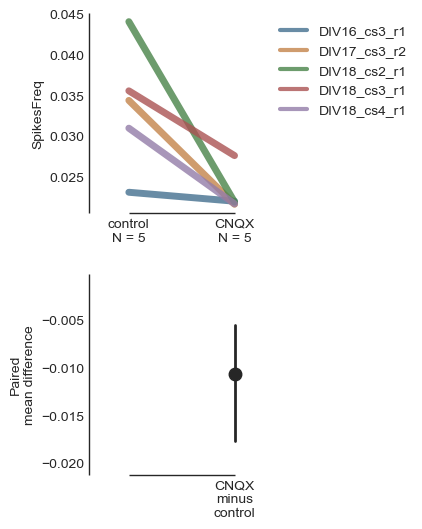

In [38]:
CNQX_change = dabest.load(data=_CNQX_df, x = 'group', y="SpikesFreq", idx = ("control", "CNQX"), paired =True,
                         id_col='dataset')
CNQX_change.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\CNQX\CNQX_amp.png',
#             bbox_inches = 'tight')
CNQX_change.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,CNQX,5,5,mean difference,True,-2.305863,95,-6.251378,-0.613448,0.0,0.0625,0.0,0.17823,1.630975


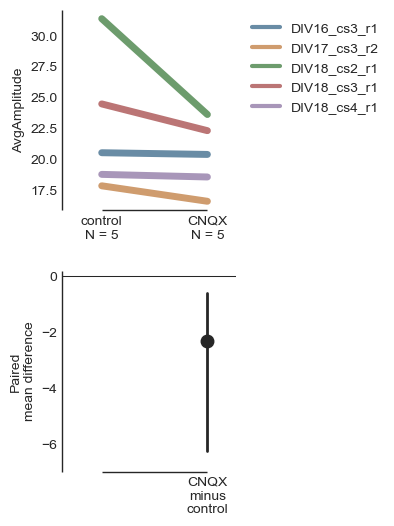

In [52]:
CNQX_amp = dabest.load(data=_CNQX_df, x = 'group', y="AvgAmplitude", idx = ("control", "CNQX"), paired =True,
                         id_col='dataset')
CNQX_amp.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
# CNQX_amp.mean_diff
CNQX_amp.mean_diff.statistical_tests

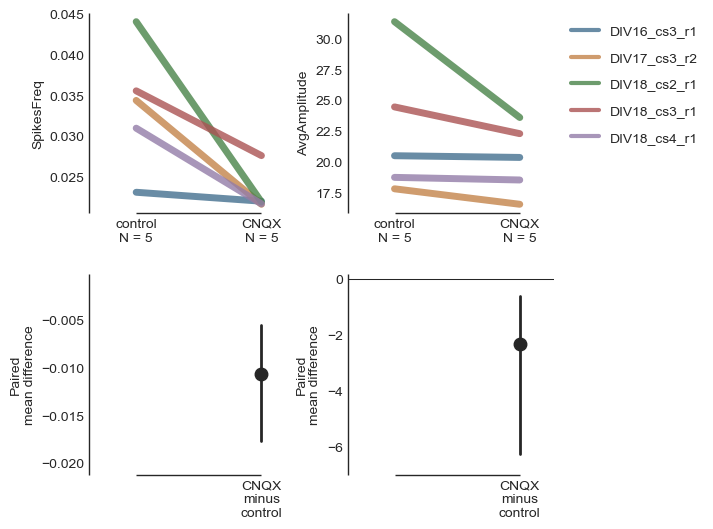

In [53]:
fig, axx = plt.subplots(nrows =1, ncols=2,
                      figsize = (6,6),gridspec_kw={'wspace': 0.25})
CNQX_change.mean_diff.plot(ax=axx.flat[0],float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
axx[0].get_legend().remove()
CNQX_amp.mean_diff.plot(ax=axx.flat[1], float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8},legend_kwargs = {'loc': 'best', 'labelspacing':1.0, 'markerscale': 100.0})
plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\CNQX\CNQX_effect_size.png',
           bbox_inches='tight')

In [42]:
PDBu_APV_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['PDBu', 'APV'])]
PDBu_APV_df

NeuronId  IsUsed      Skew  Total Frames  SpikesCount  \
dataset      group                                                            
DIV16_cs2_r1 APV     16.333333     1.0  5.677776         389.0            9   
DIV17_cs3_r2 APV     14.500000     1.0  3.696412         244.0            8   
DIV17_cs4_r1 APV     38.888889     1.0  3.902422         246.0           44   
             PDBu   465.684967     1.0  5.596013         258.0         4815   
DIV17_cs6_r1 PDBu   176.364486     1.0  5.684824         195.0          792   
DIV17_r1     PDBu   409.957929     1.0  5.094742         357.0         5322   
DIV18_cs2_r1 PDBu   148.182292     1.0  6.359966         255.0          670   
DIV18_cs2_r2 APV     70.333333     1.0  5.763983         225.0           24   
DIV18_cs2_r3 PDBu   195.436293     1.0  6.905691         294.0         1293   
DIV18_cs3_r1 PDBu   265.575931     1.0  6.517925         251.0         1469   
DIV18_cs3_r2 APV     19.800000     1.0  3.901440         253.0           28   
DIV18_cs3_r3 APV     21.750000     1.0  4.101609         212.0           12   
             PDBu   231.327485     1.0  6.192164         242.0          679   
DIV18_cs4_r1 PDBu   125.102564     1.0  5.132320         235.0          407   
DIV18_cs4_r2 APV      8.666667     1.0  5.469806         242.0           30   

                    SpikesFreq    DiffAvg  DiffMedian      DiffCV  \
dataset      group                                                  
DIV16_cs2_r1 APV      0.014022   3.208333    3.116667   35.954213   
DIV17_cs3_r2 APV      0.029806   1.430000    1.375000   34.232660   
DIV17_cs4_r1 APV      0.036134  10.348448    9.838889  112.799999   
             PDBu     0.044356  25.918440   23.624477   79.790750   
DIV17_cs6_r1 PDBu     0.034508  24.764825   23.655140   77.113683   
DIV17_r1     PDBu     0.043859  27.450459   24.107888   83.167499   
DIV18_cs2_r1 PDBu     0.024881  32.317153   30.917448   77.689985   
DIV18_cs2_r2 APV      0.032323   8.101042    7.195833   80.930190   
DIV18_cs2_r3 PDBu     0.030874  31.345425   29.382529   75.238117   
DIV18_cs3_r1 PDBu     0.030490  28.471483   26.554441   78.911991   
DIV18_cs3_r2 APV      0.040244   5.568500    5.115000   66.853712   
DIV18_cs3_r3 APV      0.025729  12.031250   12.718750   82.928039   
             PDBu     0.029833  28.249728   26.832602   82.389558   
DIV18_cs4_r1 PDBu     0.026914  27.153756   26.409402   67.652884   
DIV18_cs4_r2 APV      0.037566  13.495370    6.645833  112.181281   

                    AvgAmplitude  SpkAmpMedian   SpkAmpCV  total_count  \
dataset      group                                                       
DIV16_cs2_r1 APV       16.433333     14.166667  37.650961        334.0   
DIV17_cs3_r2 APV       15.250000     15.500000   6.572671        416.0   
DIV17_cs4_r1 APV       16.040741     15.555556  21.085990       1077.0   
             PDBu      20.217532     18.550327  41.505953       1077.0   
DIV17_cs6_r1 PDBu      19.919471     18.901869  39.165333        464.0   
DIV17_r1     PDBu      19.755052     17.791262  43.275763        984.0   
DIV18_cs2_r1 PDBu      20.971783     19.971354  40.076648        580.0   
DIV18_cs2_r2 APV       31.511111     29.500000  47.146507       1111.0   
DIV18_cs2_r3 PDBu      22.975503     20.731660  46.339133        310.0   
DIV18_cs3_r1 PDBu      20.641884     18.909742  43.469173        801.0   
DIV18_cs3_r2 APV       19.740000     19.000000  32.201962        351.0   
DIV18_cs3_r3 APV       16.104167     13.750000  34.634973        239.0   
             PDBu      23.197446     21.315789  49.182408        239.0   
DIV18_cs4_r1 PDBu      16.090799     15.034188  32.992920        430.0   
DIV18_cs4_r2 APV       26.275000     25.333333  38.665817        818.0   

                    synapse_count  max_syn  normalized_freq  
dataset      group                                           
DIV16_cs2_r1 APV              331      331         0.014022  
DIV17_cs3_r2 APV              348      348         0.029806

In [43]:
PDBu_APV_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['PDBu', 'APV'])]
# DIV18_cs3_r3 DIV17_cs4_r1
# control_APV_df
PDBu_APV_df = PDBu_APV_df.drop(['DIV16_cs2_r1','DIV17_cs3_r2',"DIV17_cs6_r1","DIV17_r1","DIV18_cs2_r1", "DIV18_cs2_r2",
                                     "DIV18_cs3_r1","DIV18_cs4_r1","DIV18_cs2_r3","DIV18_cs2_r2", "DIV18_cs3_r2",
                               "DIV18_cs3_r2","DIV18_cs4_r2"])
PDBu_APV_df
PDBu_APV_df=PDBu_APV_df.reset_index(level=1)
PDBu_APV_df=PDBu_APV_df.reset_index(level=0)

PDBu_APV_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,total_count,synapse_count,max_syn,normalized_freq
0,DIV17_cs4_r1,APV,38.888889,1.0,3.902422,246.0,44,0.036134,10.348448,9.838889,112.799999,16.040741,15.555556,21.085990,1077.0,765,303,0.091229
1,DIV17_cs4_r1,PDBu,465.684967,1.0,5.596013,258.0,4815,0.044356,25.918440,23.624477,79.790750,20.217532,18.550327,41.505953,1077.0,303,303,0.044356
2,DIV18_cs3_r3,APV,21.750000,1.0,4.101609,212.0,12,0.025729,12.031250,12.718750,82.928039,16.104167,13.750000,34.634973,239.0,171,64,0.068745
3,DIV18_cs3_r3,PDBu,231.327485,1.0,6.192164,242.0,679,0.029833,28.249728,26.832602,82.389558,23.197446,21.315789,49.182408,239.0,64,64,0.029833


In [226]:
A = PDBu_APV_df[PDBu_APV_df['group'] == 'APV']
P = PDBu_APV_df[PDBu_APV_df['group'] == 'PDBu']
np.std(P) - np.std(A)

NeuronId            108.609297
IsUsed                0.000000
Skew                  0.198481
Total Frames         -9.000000
SpikesCount        2052.000000
SpikesFreq            0.002059
DiffAvg               0.324243
DiffMedian            0.164132
DiffCV              -13.636576
AvgAmplitude          1.458244
SpkAmpMedian          0.479954
SpkAmpCV             -2.936264
synapse_count       294.500000
total_count           0.000000
max_syn               0.000000
normalized_freq       0.015872
dtype: float64

In [111]:
PDBu_APV_amp.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,PDBu,APV,2,2,mean difference,True,-5.635035,95,-7.093279,-5.635035,0.489,0.5,0.0,0.161209,3.864261


In [45]:
PDBu_APV_change.mean_diff.plot(ax=axx.flat[0],float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
PDBu_APV_change.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,PDBu,APV,2,2,mean difference,True,-0.006163,95,-0.008222,-0.006163,0.489,0.5,0.0,0.205281,2.992972


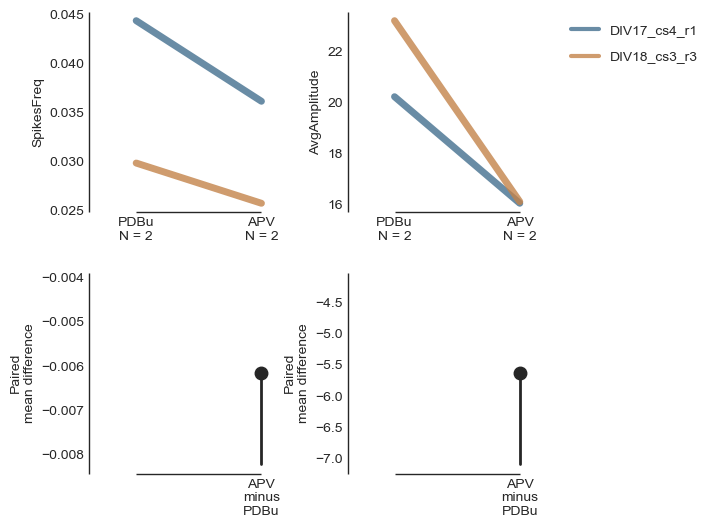

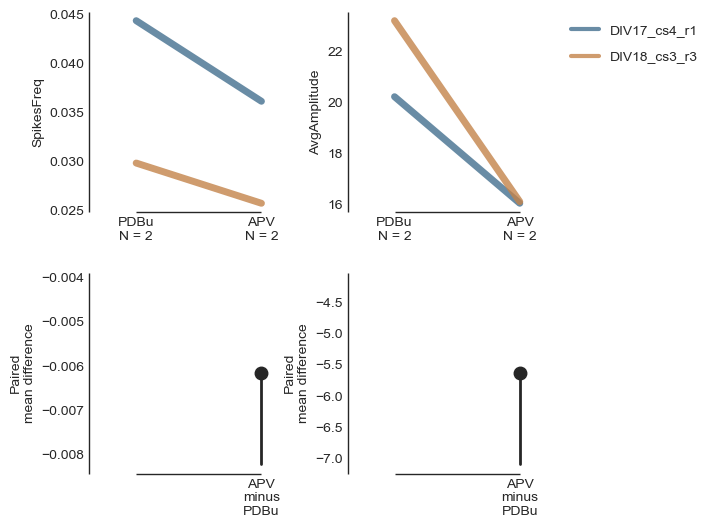

In [44]:
PDBu_APV_change = dabest.load(data=PDBu_APV_df, x = 'group', y="SpikesFreq", idx = ("PDBu", "APV"), paired =True,
                         id_col='dataset')
PDBu_APV_amp = dabest.load(data=PDBu_APV_df, x = 'group', y="AvgAmplitude", idx = ("PDBu", "APV"), paired =True,
                         id_col='dataset')

fig, axx = plt.subplots(nrows =1, ncols=2,
                      figsize = (6,6),gridspec_kw={'wspace': 0.25})
PDBu_APV_change.mean_diff.plot(ax=axx.flat[0],float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
axx[0].get_legend().remove()
PDBu_APV_amp.mean_diff.plot(ax=axx.flat[1], float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8},legend_kwargs = {'loc': 'best', 'labelspacing':1.0, 'markerscale': 100.0})

# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\APV\PDBu2APV_effect_size.png',
#            bbox_inches='tight')

In [190]:
control_APV_df

NeuronId  IsUsed      Skew  Total Frames  SpikesCount  \
dataset      group                                                              
DIV16_cs2_r1 APV       16.333333     1.0  5.677776         389.0            9   
             control  285.425982     1.0  5.968315         266.0         1354   
DIV16_cs3_r1 control  195.757709     1.0  6.577092         296.0          856   
DIV17_cs3_r2 APV       14.500000     1.0  3.696412         244.0            8   
             control  264.704023     1.0  4.950186         266.0         1752   
DIV17_cs4_r1 APV       38.888889     1.0  3.902422         246.0           44   
             control  223.617162     1.0  6.283277         260.0         1404   
DIV17_cs6_r1 control  167.266667     1.0  7.025088         256.0          597   
DIV17_r1     control  282.915301     1.0  6.319619         297.0         2129   
DIV18_cs2_r1 control  211.443299     1.0  6.408904         254.0         1791   
DIV18_cs2_r2 APV       70.333333     1.0  5.763983         225.0           24   
DIV18_cs2_r3 control   85.666667     1.0  6.887286         205.0          148   
DIV18_cs3_r1 control  279.600639     1.0  6.446816         254.0         1556   
DIV18_cs3_r2 APV       19.800000     1.0  3.901440         253.0           28   
DIV18_cs3_r3 APV       21.750000     1.0  4.101609         212.0           12   
             control   93.406250     1.0  7.071943         201.0          207   
DIV18_cs4_r1 control  181.561224     1.0  5.770166         271.0          906   
DIV18_cs4_r2 APV        8.666667     1.0  5.469806         242.0           30   

                      SpikesFreq    DiffAvg  DiffMedian      DiffCV  \
dataset      group                                                    
DIV16_cs2_r1 APV        0.014022   3.208333    3.116667   35.954213   
             control    0.027961  29.950523   27.613822   83.019602   
DIV16_cs3_r1 control    0.023163  39.708780   38.192291   75.091056   
DIV17_cs3_r2 APV        0.029806   1.430000    1.375000   34.232660   
             control    0.034412  30.819207   28.348707   78.498925   
DIV17_cs4_r1 APV        0.036134  10.348448    9.838889  112.799999   
             control    0.032403  30.793221   29.090099   78.744148   
DIV17_cs6_r1 control    0.023556  39.222065   37.193750   76.894627   
DIV17_r1     control    0.035610  31.583501   28.569194   82.722728   
DIV18_cs2_r1 control    0.044056  24.476079   22.488574   79.804670   
DIV18_cs2_r2 APV        0.032323   8.101042    7.195833   80.930190   
DIV18_cs2_r3 control    0.025738  24.362458   23.472059   74.594778   
DIV18_cs3_r1 control    0.035585  27.982509   25.923802   82.482955   
DIV18_cs3_r2 APV        0.040244   5.568500    5.115000   66.853712   
DIV18_cs3_r3 APV        0.025729  12.031250   12.718750   82.928039   
             control    0.029257  25.998019   24.788672   82.459472   
DIV18_cs4_r1 control    0.031013  28.953421   26.531888   75.686115   
DIV18_cs4_r2 APV        0.037566  13.495370    6.645833  112.181281   

                      AvgAmplitude  SpkAmpMedian   SpkAmpCV  synapse_count  \
dataset      group                                                           
DIV16_cs2_r1 APV         16.433333     14.166667  37.650961              3   
             control     29.433670     26.241692  54.895022            331   
DIV16_cs3_r1 control     20.515980     19.374449  40.318066            227   
DIV17_cs3_r2 APV         15.250000     15.500000   6.572671              2   
             control     17.837208     16.770115  33.522247            348   
DIV17_cs4_r1 APV         16.040741     15.555556  21.085990              9   
             control     22.737715     21.386139  42.544468            303   
DIV17_cs6_r1 control     22.753422     21.644444  41.441276            180   
DIV17_r1     control     21.893479     20.064208  43.704714            366   
DIV18_cs2_r1 control     31.370833     28.087629  54.089275            291   
DIV18_cs2_r2 APV         31.511111     29.5000

In [20]:
_CNQX_df

NameError: name '_CNQX_df' is not defined

In [29]:
control_APV_df

NeuronId  IsUsed      Skew  Total Frames  SpikesCount  \
dataset      group                                                              
DIV16_cs2_r1 APV       16.333333     1.0  5.677776         389.0            9   
             control  285.425982     1.0  5.968315         266.0         1354   
DIV16_cs3_r1 control  195.757709     1.0  6.577092         296.0          856   
DIV17_cs3_r2 APV       14.500000     1.0  3.696412         244.0            8   
             control  264.704023     1.0  4.950186         266.0         1752   
DIV17_cs4_r1 APV       38.888889     1.0  3.902422         246.0           44   
             control  223.617162     1.0  6.283277         260.0         1404   
DIV17_cs6_r1 control  167.266667     1.0  7.025088         256.0          597   
DIV17_r1     control  282.915301     1.0  6.319619         297.0         2129   
DIV18_cs2_r1 control  211.443299     1.0  6.408904         254.0         1791   
DIV18_cs2_r2 APV       70.333333     1.0  5.763983         225.0           24   
DIV18_cs2_r3 control   85.666667     1.0  6.887286         205.0          148   
DIV18_cs3_r1 control  279.600639     1.0  6.446816         254.0         1556   
DIV18_cs3_r2 APV       19.800000     1.0  3.901440         253.0           28   
DIV18_cs3_r3 APV       21.750000     1.0  4.101609         212.0           12   
             control   93.406250     1.0  7.071943         201.0          207   
DIV18_cs4_r1 control  181.561224     1.0  5.770166         271.0          906   
DIV18_cs4_r2 APV        8.666667     1.0  5.469806         242.0           30   

                      SpikesFreq    DiffAvg  DiffMedian      DiffCV  \
dataset      group                                                    
DIV16_cs2_r1 APV        0.014022   3.208333    3.116667   35.954213   
             control    0.027961  29.950523   27.613822   83.019602   
DIV16_cs3_r1 control    0.023163  39.708780   38.192291   75.091056   
DIV17_cs3_r2 APV        0.029806   1.430000    1.375000   34.232660   
             control    0.034412  30.819207   28.348707   78.498925   
DIV17_cs4_r1 APV        0.036134  10.348448    9.838889  112.799999   
             control    0.032403  30.793221   29.090099   78.744148   
DIV17_cs6_r1 control    0.023556  39.222065   37.193750   76.894627   
DIV17_r1     control    0.035610  31.583501   28.569194   82.722728   
DIV18_cs2_r1 control    0.044056  24.476079   22.488574   79.804670   
DIV18_cs2_r2 APV        0.032323   8.101042    7.195833   80.930190   
DIV18_cs2_r3 control    0.025738  24.362458   23.472059   74.594778   
DIV18_cs3_r1 control    0.035585  27.982509   25.923802   82.482955   
DIV18_cs3_r2 APV        0.040244   5.568500    5.115000   66.853712   
DIV18_cs3_r3 APV        0.025729  12.031250   12.718750   82.928039   
             control    0.029257  25.998019   24.788672   82.459472   
DIV18_cs4_r1 control    0.031013  28.953421   26.531888   75.686115   
DIV18_cs4_r2 APV        0.037566  13.495370    6.645833  112.181281   

                      AvgAmplitude  SpkAmpMedian   SpkAmpCV  total_count  \
dataset      group                                                         
DIV16_cs2_r1 APV         16.433333     14.166667  37.650961        334.0   
             control     29.433670     26.241692  54.895022        334.0   
DIV16_cs3_r1 control     20.515980     19.374449  40.318066        638.0   
DIV17_cs3_r2 APV         15.250000     15.500000   6.572671        416.0   
             control     17.837208     16.770115  33.522247        416.0   
DIV17_cs4_r1 APV         16.040741     15.555556  21.085990       1077.0   
             control     22.737715     21.386139  42.544468       1077.0   
DIV17_cs6_r1 control     22.753422     21.644444  41.441276        464.0   
DIV17_r1     control     21.893479     20.064208  43.704714        984.0   
DIV18_cs2_r1 control     31.370833     28.087629  54.089275        580.0   
DIV18_cs2_r2 APV         31.511111     29.500000  47.146507       1111

In [32]:
control_APV_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['control', 'APV'])]
# DIV18_cs3_r3 DIV17_cs4_r1
control_APV_df
_APV_df = control_APV_df.drop(['DIV16_cs3_r1',"DIV17_cs6_r1","DIV17_r1","DIV18_cs2_r1", "DIV18_cs2_r2",
                                     "DIV18_cs3_r1","DIV18_cs4_r1","DIV18_cs2_r3", "DIV18_cs3_r2",
                               "DIV18_cs4_r2"])
_APV_df
_APV_df=_APV_df.reset_index(level=1)
_APV_df=_APV_df.reset_index(level=0)

_APV_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,total_count,synapse_count,max_syn,normalized_freq
0,DIV16_cs2_r1,APV,16.333333,1.0,5.677776,389.0,9,0.014022,3.208333,3.116667,35.954213,16.433333,14.166667,37.650961,334.0,331,331,0.014022
1,DIV16_cs2_r1,control,285.425982,1.0,5.968315,266.0,1354,0.027961,29.950523,27.613822,83.019602,29.433670,26.241692,54.895022,334.0,3,331,0.000253
2,DIV17_cs3_r2,APV,14.500000,1.0,3.696412,244.0,8,0.029806,1.430000,1.375000,34.232660,15.250000,15.500000,6.572671,416.0,348,348,0.029806
3,DIV17_cs3_r2,control,264.704023,1.0,4.950186,266.0,1752,0.034412,30.819207,28.348707,78.498925,17.837208,16.770115,33.522247,416.0,2,348,0.000198
4,DIV17_cs4_r1,APV,38.888889,1.0,3.902422,246.0,44,0.036134,10.348448,9.838889,112.799999,16.040741,15.555556,21.085990,1077.0,765,303,0.091229
5,DIV17_cs4_r1,control,223.617162,1.0,6.283277,260.0,1404,0.032403,30.793221,29.090099,78.744148,22.737715,21.386139,42.544468,1077.0,9,303,0.000962
6,DIV18_cs3_r3,APV,21.750000,1.0,4.101609,212.0,12,0.025729,12.031250,12.718750,82.928039,16.104167,13.750000,34.634973,239.0,171,64,0.068745
7,DIV18_cs3_r3,control,93.406250,1.0,7.071943,201.0,207,0.029257,25.998019,24.788672,82.459472,25.073653,23.492188,41.536289,239.0,4,64,0.001829


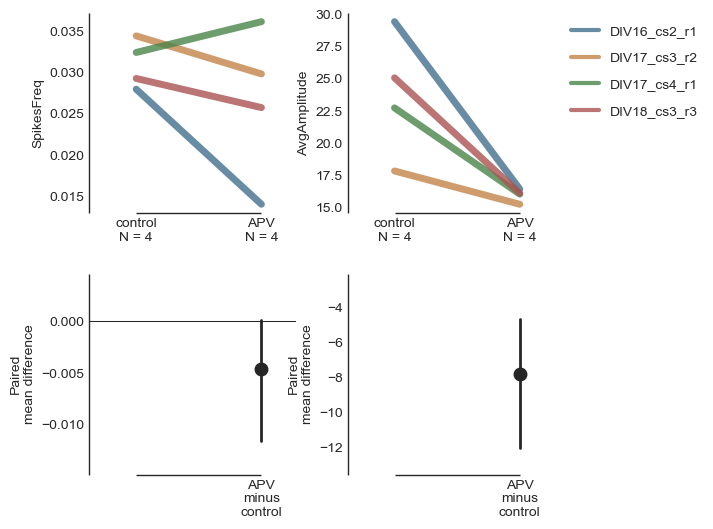

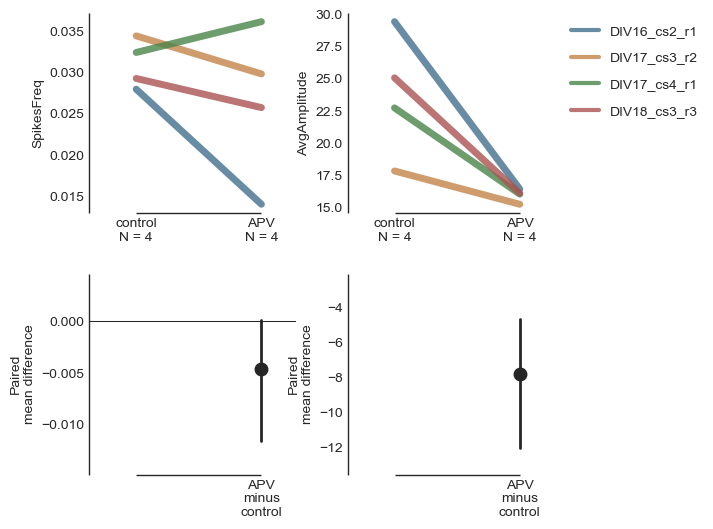

In [54]:


fig, axx = plt.subplots(nrows =1, ncols=2,
                      figsize = (6,6),gridspec_kw={'wspace': 0.25})
APV_change.mean_diff.plot(ax=axx.flat[0],float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
axx[0].get_legend().remove()
APV_amp.mean_diff.plot(ax=axx.flat[1], float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8},legend_kwargs = {'loc': 'best', 'labelspacing':1.0, 'markerscale': 100.0})
# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\APV\APV_effect_size.png',
#            bbox_inches='tight')

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,APV,4,4,mean difference,True,-0.004586,95,-0.011605,0.000101,0.3692,0.375,2.0,0.295294,1.264704


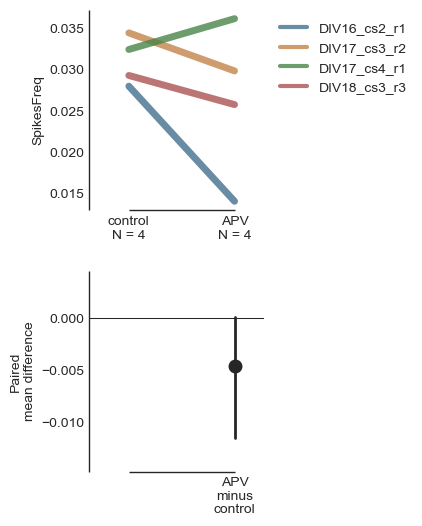

In [46]:
APV_change = dabest.load(data=_APV_df, x = 'group', y="SpikesFreq", idx = ("control", "APV"), paired =True,
                         id_col='dataset')
APV_change.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\APV\APV_amp.png',
#            bbox_inches = 'tight')
APV_change.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,control,APV,4,4,mean difference,True,-7.813501,95,-11.992624,-4.642091,0.1262,0.125,0.0,0.036987,3.591376


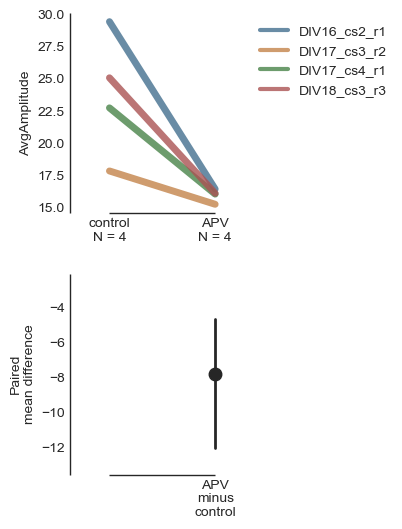

In [47]:
APV_amp = dabest.load(data=_APV_df, x = 'group', y="AvgAmplitude", idx = ("control", "APV"), paired =True,
                         id_col='dataset')
APV_amp.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
APV_amp.mean_diff.statistical_tests

In [198]:
control_Potentiated_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['control', 'Potentiated'])]
control_Potentiated_df
_Potentiated_df = control_Potentiated_df.drop(["DIV16_cs2_r1",'DIV16_cs3_r1',"DIV17_cs3_r2","DIV17_cs6_r1",
                                               "DIV17_cs4_r1","DIV17_r1",
                                               "DIV18_cs2_r3","DIV18_cs3_r3"
                                              ])
_Potentiated_df
_Potentiated_df=_Potentiated_df.reset_index(level=1)
_Potentiated_df=_Potentiated_df.reset_index(level=0)
_Potentiated_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,synapse_count,total_count,max_syn,normalized_freq
0,DIV18_cs2_r1,control,211.443299,1.0,6.408904,254.0,1791,0.044056,24.476079,22.488574,79.804670,31.370833,28.087629,54.089275,291,580.0,291,0.044056
1,DIV18_cs2_r2,Potentiated,547.736471,1.0,6.172591,259.0,6015,0.049677,22.191327,19.754706,80.238636,26.176316,22.967647,52.961978,850,1111.0,850,0.049677
2,DIV18_cs3_r1,control,279.600639,1.0,6.446816,254.0,1556,0.035585,27.982509,25.923802,82.482955,24.467368,21.971246,49.243131,313,801.0,313,0.035585
3,DIV18_cs3_r2,Potentiated,216.968254,1.0,6.229366,254.0,1128,0.032041,32.873839,30.906944,73.517199,19.699663,18.482143,37.384650,252,351.0,252,0.032041
4,DIV18_cs4_r1,control,181.561224,1.0,5.770166,271.0,906,0.031013,28.953421,26.531888,75.686115,18.762665,17.433673,37.564847,196,430.0,196,0.031013
5,DIV18_cs4_r2,Potentiated,443.797737,1.0,5.672140,259.0,5089,0.050530,22.536578,20.012376,77.905465,20.497679,18.255304,43.979705,707,818.0,707,0.050530


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,control,Potentiated,3,3,mean difference,False,0.007198,95,-0.007667,0.016185,0.1902,0.379636,-1.008844,0.370121,-1.008844,0.4,2.0


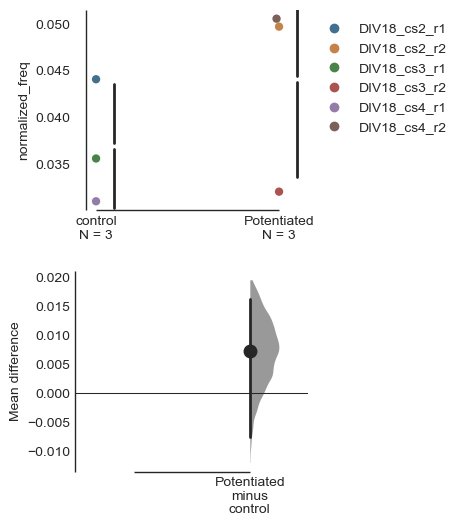

In [199]:
Potentiated_change = dabest.load(data=_Potentiated_df, x = 'group', y="normalized_freq", idx = ("control", "Potentiated"))
Potentiated_change.mean_diff.plot(float_contrast=False, color_col="dataset")
Potentiated_change.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,control,Potentiated,3,3,mean difference,False,-2.742402,95,-9.370015,3.361888,0.5926,0.556379,0.656605,0.547291,0.656605,1.0,5.0


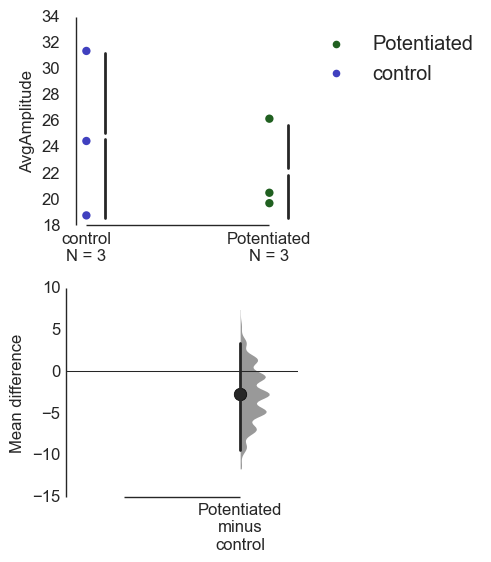

In [277]:
Potentiated_Amp = dabest.load(data=_Potentiated_df, x = 'group', y="AvgAmplitude", idx = ("control", "Potentiated"))
Potentiated_Amp.mean_diff.plot(float_contrast=False, color_col="group")
Potentiated_Amp.mean_diff.statistical_tests

In [201]:

potentiated_CNQX_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['CNQX', 'Potentiated'])]
potentiated_CNQX_df
potentiated_CNQX_df = potentiated_CNQX_df.drop(['DIV16_cs3_r1',"DIV17_cs3_r2","DIV17_cs6_r1","DIV18_cs2_r1",
                                               "DIV18_cs3_r1","DIV18_cs4_r1"])
potentiated_CNQX_df
potentiated_CNQX_df=potentiated_CNQX_df.reset_index(level=1)
potentiated_CNQX_df=potentiated_CNQX_df.reset_index(level=0)

potentiated_CNQX_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,synapse_count,total_count,max_syn,normalized_freq
0,DIV18_cs2_r2,CNQX,234.572549,1.0,7.700900,280.0,912,0.023224,31.285089,30.095784,74.778492,28.310874,25.790196,48.752489,255,1111.0,850,0.006967
1,DIV18_cs2_r2,Potentiated,547.736471,1.0,6.172591,259.0,6015,0.049677,22.191327,19.754706,80.238636,26.176316,22.967647,52.961978,850,1111.0,850,0.049677
2,DIV18_cs3_r2,CNQX,116.946809,1.0,6.854122,257.0,284,0.021374,33.587405,32.248138,73.729620,19.882763,18.351064,40.846117,94,351.0,252,0.007973
3,DIV18_cs3_r2,Potentiated,216.968254,1.0,6.229366,254.0,1128,0.032041,32.873839,30.906944,73.517199,19.699663,18.482143,37.384650,252,351.0,252,0.032041
4,DIV18_cs4_r2,CNQX,168.000000,1.0,6.253671,263.0,501,0.032986,33.627256,31.153571,80.129107,23.607671,21.300000,49.408832,105,818.0,707,0.004899
5,DIV18_cs4_r2,Potentiated,443.797737,1.0,5.672140,259.0,5089,0.050530,22.536578,20.012376,77.905465,20.497679,18.255304,43.979705,707,818.0,707,0.050530


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,Potentiated,CNQX,3,3,mean difference,True,-0.03747,95,-0.045631,-0.030282,0.0,0.25,0.0,0.030984,5.548169


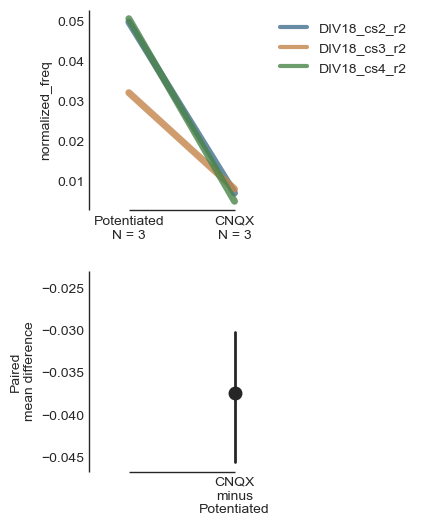

In [202]:
Potentiated_CNQX_change = dabest.load(data=potentiated_CNQX_df, x = 'group', y="normalized_freq", idx = ("Potentiated", "CNQX"),
                                     paired = True, id_col='dataset')
Potentiated_CNQX_change.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
Potentiated_CNQX_change.mean_diff.statistical_tests


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,Potentiated,CNQX,3,3,mean difference,True,1.809217,95,0.183101,2.784847,0.0,0.25,0.0,0.170221,-2.102671


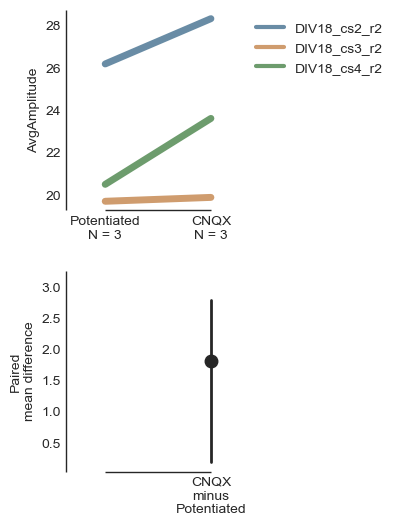

In [203]:
Potentiated_CNQX_amp = dabest.load(data=potentiated_CNQX_df, x = 'group', y="AvgAmplitude", idx = ("Potentiated", "CNQX"),
                                     paired = True, id_col='dataset')
Potentiated_CNQX_amp.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
Potentiated_CNQX_amp.mean_diff.statistical_tests


In [48]:
CNQX_PDBu_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['CNQX', 'PDBu'])]
CNQX_PDBu_df

NeuronId  IsUsed      Skew  Total Frames  SpikesCount  \
dataset      group                                                            
DIV16_cs3_r1 CNQX   289.413625     1.0  7.147604         345.0         1721   
DIV17_cs3_r2 CNQX    65.272727     1.0  6.651686         254.0          200   
DIV17_cs4_r1 PDBu   465.684967     1.0  5.596013         258.0         4815   
DIV17_cs6_r1 CNQX   100.171429     1.0  6.951634         313.0          217   
             PDBu   176.364486     1.0  5.684824         195.0          792   
DIV17_r1     PDBu   409.957929     1.0  5.094742         357.0         5322   
DIV18_cs2_r1 CNQX    92.041237     1.0  6.965655         255.0          299   
             PDBu   148.182292     1.0  6.359966         255.0          670   
DIV18_cs2_r2 CNQX   234.572549     1.0  7.700900         280.0          912   
DIV18_cs2_r3 PDBu   195.436293     1.0  6.905691         294.0         1293   
DIV18_cs3_r1 CNQX   168.021583     1.0  6.012755         228.0          482   
             PDBu   265.575931     1.0  6.517925         251.0         1469   
DIV18_cs3_r2 CNQX   116.946809     1.0  6.854122         257.0          284   
DIV18_cs3_r3 PDBu   231.327485     1.0  6.192164         242.0          679   
DIV18_cs4_r1 CNQX    94.786325     1.0  6.526257         258.0          361   
             PDBu   125.102564     1.0  5.132320         235.0          407   
DIV18_cs4_r2 CNQX   168.000000     1.0  6.253671         263.0          501   

                    SpikesFreq    DiffAvg  DiffMedian     DiffCV  \
dataset      group                                                 
DIV16_cs3_r1 CNQX     0.022068  42.514824   39.683637  82.560348   
DIV17_cs3_r2 CNQX     0.021692  27.762285   27.254167  64.423989   
DIV17_cs4_r1 PDBu     0.044356  25.918440   23.624477  79.790750   
DIV17_cs6_r1 CNQX     0.018008  35.905852   35.357143  67.447703   
             PDBu     0.034508  24.764825   23.655140  77.113683   
DIV17_r1     PDBu     0.043859  27.450459   24.107888  83.167499   
DIV18_cs2_r1 CNQX     0.021978  32.319835   31.582474  71.536929   
             PDBu     0.024881  32.317153   30.917448  77.689985   
DIV18_cs2_r2 CNQX     0.023224  31.285089   30.095784  74.778492   
DIV18_cs2_r3 PDBu     0.030874  31.345425   29.382529  75.238117   
DIV18_cs3_r1 CNQX     0.027653  32.189438   31.276799  83.044137   
             PDBu     0.030490  28.471483   26.554441  78.911991   
DIV18_cs3_r2 CNQX     0.021374  33.587405   32.248138  73.729620   
DIV18_cs3_r3 PDBu     0.029833  28.249728   26.832602  82.389558   
DIV18_cs4_r1 CNQX     0.021744  37.817400   36.650214  71.067719   
             PDBu     0.026914  27.153756   26.409402  67.652884   
DIV18_cs4_r2 CNQX     0.032986  33.627256   31.153571  80.129107   

                    AvgAmplitude  SpkAmpMedian   SpkAmpCV  total_count  \
dataset      group                                                       
DIV16_cs3_r1 CNQX      20.377477     19.043796  40.215659        638.0   
DIV17_cs3_r2 CNQX      16.584019     16.340909  30.322859        416.0   
DIV17_cs4_r1 PDBu      20.217532     18.550327  41.505953       1077.0   
DIV17_cs6_r1 CNQX      22.419153     21.450000  40.006912        464.0   
             PDBu      19.919471     18.901869  39.165333        464.0   
DIV17_r1     PDBu      19.755052     17.791262  43.275763        984.0   
DIV18_cs2_r1 CNQX      23.609405     22.365979  45.240212        580.0   
             PDBu      20.971783     19.971354  40.076648        580.0   
DIV18_cs2_r2 CNQX      28.310874     25.790196  48.752489       1111.0   
DIV18_cs2_r3 PDBu      22.975503     20.731660  46.339133        310.0   
DIV18_cs3_r1 CNQX      22.302349     21.255396  41.206049        801.0   
             PDBu      20.641884     18.909742  43.469173        801.0   
DIV18_cs3_r2 CNQX      19.882763     18.351064  40.846117        351.0   
DIV18_cs3_r3 PDBu      23.197446     21.315789  49.182408        239.0   
DIV18_cs4_r1 CNQX      18.551486     17.615

In [49]:
CNQX_PDBu_df = coverslip_df[np.in1d(coverslip_df.index.get_level_values(1), ['CNQX', 'PDBu'])]
CNQX_PDBu_df
_CNQX_PDBu_df = CNQX_PDBu_df.drop(["DIV16_cs3_r1",'DIV17_cs3_r2',"DIV17_cs4_r1","DIV17_cs6_r1",
                                               "DIV17_r1","DIV18_cs2_r2",
                                               "DIV18_cs2_r3","DIV18_cs3_r2","DIV18_cs3_r3","DIV18_cs4_r2"
                                              ])
_CNQX_PDBu_df
_CNQX_PDBu_df=_CNQX_PDBu_df.reset_index(level=1)
_CNQX_PDBu_df=_CNQX_PDBu_df.reset_index(level=0)

_CNQX_PDBu_df

,dataset,group,NeuronId,IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV,total_count,synapse_count,max_syn,normalized_freq
0,DIV18_cs2_r1,CNQX,92.041237,1.0,6.965655,255.0,299,0.021978,32.319835,31.582474,71.536929,23.609405,22.365979,45.240212,580.0,291,291,0.021978
1,DIV18_cs2_r1,PDBu,148.182292,1.0,6.359966,255.0,670,0.024881,32.317153,30.917448,77.689985,20.971783,19.971354,40.076648,580.0,192,291,0.016416
2,DIV18_cs3_r1,CNQX,168.021583,1.0,6.012755,228.0,482,0.027653,32.189438,31.276799,83.044137,22.302349,21.255396,41.206049,801.0,349,313,0.030833
3,DIV18_cs3_r1,PDBu,265.575931,1.0,6.517925,251.0,1469,0.030490,28.471483,26.554441,78.911991,20.641884,18.909742,43.469173,801.0,313,313,0.030490
4,DIV18_cs4_r1,CNQX,94.786325,1.0,6.526257,258.0,361,0.021744,37.817400,36.650214,71.067719,18.551486,17.615385,34.460414,430.0,196,196,0.021744
5,DIV18_cs4_r1,PDBu,125.102564,1.0,5.132320,235.0,407,0.026914,27.153756,26.409402,67.652884,16.090799,15.034188,32.992920,430.0,117,196,0.016066


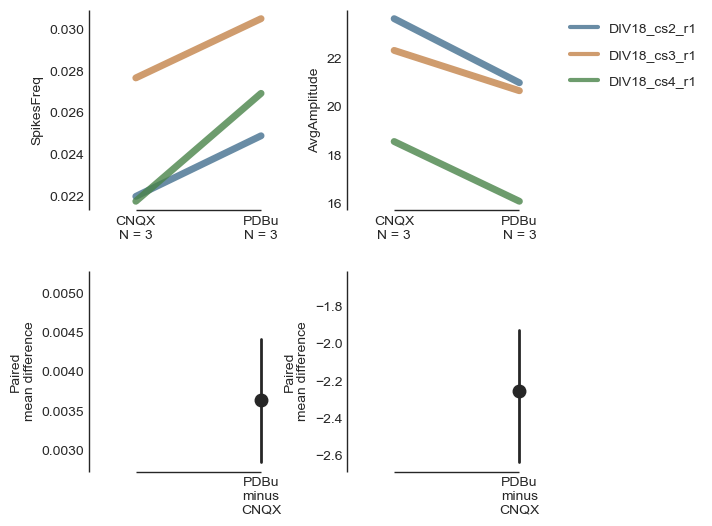

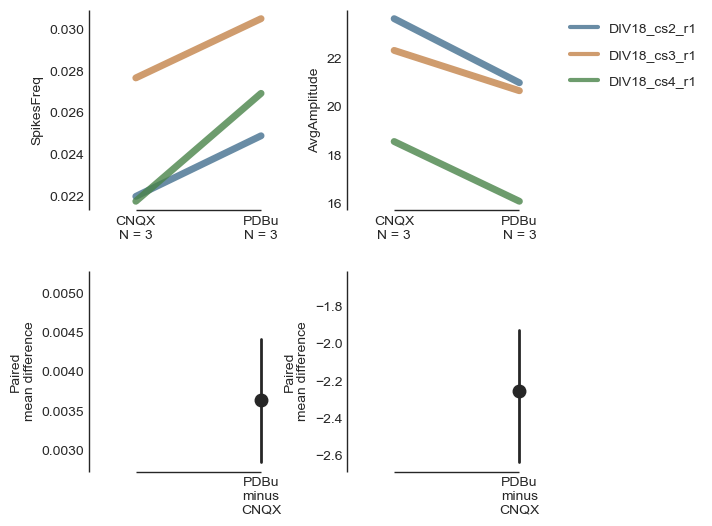

In [234]:
fig, axx = plt.subplots(nrows =1, ncols=2,
                      figsize = (6,6),gridspec_kw={'wspace': 0.25})
CNQX_PDBu_change.mean_diff.plot(ax=axx.flat[0],float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
axx[0].get_legend().remove()
CNQX_PDBu_Amp.mean_diff.plot(ax=axx.flat[1], float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8},legend_kwargs = {'loc': 'best', 'labelspacing':1.0})
# plt.savefig(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\CNQX+PDBu\freq_amp_effect_size.png',
#            bbox_inches='tight')

In [112]:
CNQX_PDBu_Amp.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,CNQX,PDBu,3,3,mean difference,True,-2.252925,95,-2.637623,-1.927206,0.0,0.25,0.0,0.017341,7.494731


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,CNQX,PDBu,3,3,mean difference,True,0.003637,95,0.002838,0.004414,0.0,0.25,0.0,0.041698,-4.742622


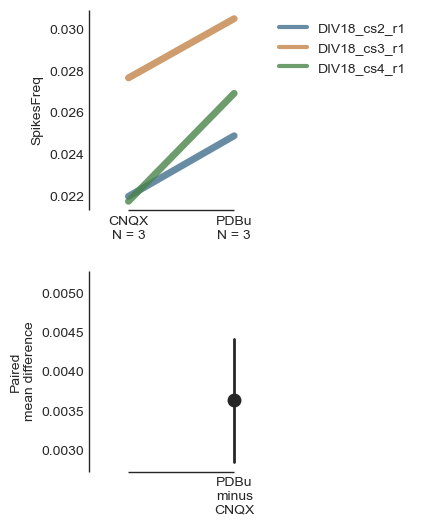

In [50]:
CNQX_PDBu_change = dabest.load(data=_CNQX_PDBu_df, x = 'group', y="SpikesFreq", idx = ("CNQX", "PDBu"),
                              paired=True, id_col='dataset')
CNQX_PDBu_change.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
CNQX_PDBu_change.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,CNQX,PDBu,3,3,mean difference,True,-2.252925,95,-2.637623,-1.927206,0.0,0.25,0.0,0.017341,7.494731


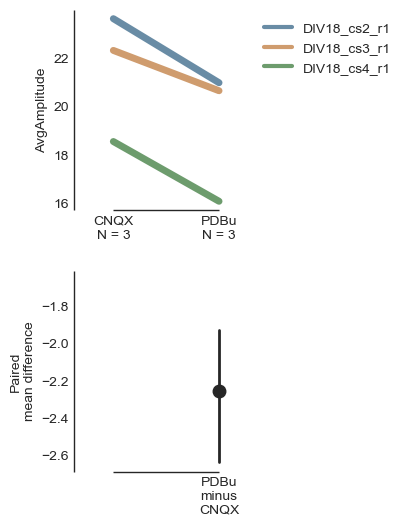

In [51]:
CNQX_PDBu_Amp = dabest.load(data=_CNQX_PDBu_df, x = 'group', y="AvgAmplitude", idx = ("CNQX", "PDBu"),
                              paired=True, id_col='dataset')
CNQX_PDBu_Amp.mean_diff.plot(float_contrast=False, color_col="dataset", halfviolin_alpha = 0,
                           slopegraph_kwargs = {'lw':5, 'alpha': 0.8})
CNQX_PDBu_Amp.mean_diff.statistical_tests

In [ ]:
agg_df = final_df.groupby(['dataset', 'group']).agg({"SpikesCount": ['sum'],
                                            'Total Frames': ['mean'],
                                            'SpikesFreq': ['mean', 'std'],
                                            'AvgAmplitude': ['mean', 'std']
                                           })

In [283]:
agg_df

dataset        group SpikesCount Total Frames SpikesFreq            \
                                      sum         mean       mean       std   
0   DIV16_cs2_r1          APV           9        389.0   0.014022  0.008096   
1   DIV16_cs2_r1      control        1354        266.0   0.027961  0.015419   
2   DIV16_cs3_r1         CNQX        1721        345.0   0.022068  0.014483   
3   DIV16_cs3_r1      control         856        296.0   0.023163  0.016211   
4   DIV17_cs3_r2          APV           8        244.0   0.029806  0.021076   
5   DIV17_cs3_r2         CNQX         200        254.0   0.021692  0.014749   
6   DIV17_cs3_r2      control        1752        266.0   0.034412  0.024066   
7   DIV17_cs4_r1          APV          44        246.0   0.036134  0.040388   
8   DIV17_cs4_r1         PDBu        4815        258.0   0.044356  0.034847   
9   DIV17_cs4_r1      control        1404        260.0   0.032403  0.027810   
10  DIV17_cs6_r1         CNQX         217        313.0   0.018008  0.009897   
11  DIV17_cs6_r1         PDBu         792        195.0   0.034508  0.023446   
12  DIV17_cs6_r1      control         597        256.0   0.023556  0.013355   
13      DIV17_r1         PDBu        5322        357.0   0.043859  0.035271   
14      DIV17_r1      control        2129        297.0   0.035610  0.031459   
15  DIV18_cs2_r1         CNQX         299        255.0   0.021978  0.012378   
16  DIV18_cs2_r1         PDBu         670        255.0   0.024881  0.015094   
17  DIV18_cs2_r1      control        1791        254.0   0.044056  0.030746   
18  DIV18_cs2_r2          APV          24        225.0   0.032323  0.021683   
19  DIV18_cs2_r2         CNQX         912        280.0   0.023224  0.015344   
20  DIV18_cs2_r2  Potentiated        6015        259.0   0.049677  0.031868   
21  DIV18_cs2_r3         PDBu        1293        294.0   0.030874  0.024357   
22  DIV18_cs2_r3      control         148        205.0   0.025738  0.014762   
23  DIV18_cs3_r1         CNQX         482        228.0   0.027653  0.021105   
24  DIV18_cs3_r1         PDBu        1469        251.0   0.030490  0.019707   
25  DIV18_cs3_r1      control        1556        254.0   0.035585  0.027236   
26  DIV18_cs3_r2          APV          28        253.0   0.040244  0.028110   
27  DIV18_cs3_r2         CNQX         284        257.0   0.021374  0.009786   
28  DIV18_cs3_r2  Potentiated        1128        254.0   0.032041  0.024056   
29  DIV18_cs3_r3          APV          12        212.0   0.025729  0.007003   
30  DIV18_cs3_r3         PDBu         679        242.0   0.029833  0.019275   
31  DIV18_cs3_r3      control         207        201.0   0.029257  0.026025   
32  DIV18_cs4_r1         CNQX         361        258.0   0.021744  0.010971   
33  DIV18_cs4_r1         PDBu         407        235.0   0.026914  0.015055   
34  DIV18_cs4_r1      control         906        271.0   0.031013  0.019810   
35  DIV18_cs4_r2          APV          30        242.0   0.037566  0.021250   
36  DIV18_cs4_r2         CNQX         501        263.0   0.032986  0.019932   
37  DIV18_cs4_r2  Potentiated        5089        259.0   0.050530  0.034947   

   AvgAmplitude             
           mean        std  
0     16.433333   6.764860  
1     29.433670  14.486062  
2     20.377477   8.067447  
3     20.515980   8.178091  
4     15.250000   3.889087  
5     16.584019   6.062365  
6     17.837208   7.319849  
7     16.040741   5.079200  
8     20.217532   6.387774  
9     22.737715   8.614726  
10    22.419153   8.405230  
11    19.919471   7.206907  
12    22.753422   9.679701  
13    19.755052   6.658128  
14    21.893479   8.740199  
15    23.609405  12.210662  
16    20.971783   9.523465  
17    31.370833  20.353142  
18    31.511111  25.524600  
19    28.310874  16.105710  
20    26.176316  13.192402  
21    22.975503   9.144239  
22    23.274287   9.194637  
23    22.302349  10.371546  
24    20.641884   8.230794  
25    24.467368   9.779180  
26    19.740000   4.911913  
27    1

In [ ]:
DIV17_cs4_r1_baselineDur420sInt550msBin550ms_filtered.pkl
DIV17_cs6_r1_CNQXDur420sInt550msBin550ms_filtered.pkl
DIV17_cs6_r1_PDBuDur420sInt550msBin550ms_filtered.pkl
DIV17_cs6_r1_baselineDur420sInt550msBin550ms_filtered.pkl
DIV17_r1_PDBuDur420sInt550msBin550ms_filtered.pkl
DIV17_r1_baselineDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r1_CNQXDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r1_PDBuDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r1_baselineDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r2_APVDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r2_CNQXDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r2_baselineDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r3_PDBuDur420sInt550msBin550ms_filtered.pkl
DIV18_cs2_r3_baselineDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r1_CNQXDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r1_PDBuDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r1_baselineDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r2_APVDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r2_CNQXDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r2_baselineDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r3_APVDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r3_PDBuDur420sInt550msBin550ms_filtered.pkl
DIV18_cs3_r3_baselineDur420sInt550msBin550ms_filtered.pkl


In [262]:
baselinePDBu_index = ["DIV17_r1_baselineDur420sInt550msBin550ms_filtered.pkl",
"DIV17_cs6_r1_baselineDur420sInt550msBin550ms_filtered.pkl",
"DIV17_cs4_r1_baselineDur420sInt550msBin550ms_filtered.pkl",
"DIV18_cs2_r3_baselineDur420sInt550msBin550ms_filtered.pkl",
"DIV18_cs3_r3_baselineDur420sInt550msBin550ms_filtered.pkl"]
PDBu_index = ["DIV17_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"
"DIV17_cs6_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"
"DIV17_cs4_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"
"DIV18_cs2_r3_PDBuDur420sInt550msBin550ms_filtered.pkl"
"DIV18_cs3_r3_PDBuDur420sInt550msBin550ms_filtered.pkl"]
baselineCNQX_index = []
baselineAPV_index = []


In [46]:
PDBu_vs_base = pd.read_csv(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\aggregated_statistics_by_cs+condition_new.csv',
             header=0, index_col=0, skiprows=[1,2,3,4,5,6,7,8,11,16,17,18,19,20,21,24,25,26,27,28,
                                             29,30,33,34,35,36,37,38])
PDBu_vs_base

,Synapse Count (filtered),IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV
file_name,,,,,,,,,,,,
DIV17_cs4_r1_PDBuDur420sInt550msBin550ms_filtered.pkl,765,1,5.596013,258,6.294118,0.044356,25.918440,23.624477,79.790750,20.217532,18.550327,41.505953
DIV17_cs4_r1_baselineDur420sInt550msBin550ms_filtered.pkl,303,1,6.283277,260,4.633663,0.032403,30.793221,29.090099,78.744148,22.737715,21.386139,42.544468
DIV17_cs6_r1_PDBuDur420sInt550msBin550ms_filtered.pkl,214,1,5.684824,195,3.700935,0.034508,24.764825,23.655140,77.113682,19.919471,18.901869,39.165333
DIV17_cs6_r1_baselineDur420sInt550msBin550ms_filtered.pkl,180,1,7.025088,256,3.316667,0.023556,39.222065,37.193750,76.894627,22.753422,21.644444,41.441276
DIV17_r1_PDBuDur420sInt550msBin550ms_filtered.pkl,618,1,5.094742,357,8.611650,0.043859,27.450459,24.107888,83.167499,19.755052,17.791262,43.275763
DIV17_r1_baselineDur420sInt550msBin550ms_filtered.pkl,366,1,6.319619,297,5.816940,0.035610,31.583501,28.569194,82.722728,21.893479,20.064208,43.704714
DIV18_cs2_r3_PDBuDur420sInt550msBin550ms_filtered.pkl,259,1,6.905691,294,4.992278,0.030874,31.345425,29.382529,75.238117,22.975503,20.731660,46.339133
DIV18_cs2_r3_baselineDur420sInt550msBin550ms_filtered.pkl,51,1,6.887286,205,2.901961,0.025738,24.362458,23.472059,74.594778,23.274287,21.637255,41.976429
DIV18_cs3_r3_PDBuDur420sInt550msBin550ms_filtered.pkl,171,1,6.192164,242,3.970760,0.029833,28.249728,26.832602,82.389558,23.197446,21.315789,49.182408


In [44]:
PDBu = pd.read_csv(r'C:\Users\jcbeg\OneDrive - Charité - Universitätsmedizin Berlin\Desktop\ECN\MSc Thesis\Figures\final_output\aggregated_statistics_by_cs+condition_new.csv',
             header=0, index_col=0, skiprows=[1,2,3,4,5,6,7,8,10,11,13,15,16,17,18,19,20,21,23,24,25,26,27,28,
                                             29,30,32,33,34,35,36,37,38])
PDBu

,Synapse Count (filtered),IsUsed,Skew,Total Frames,SpikesCount,SpikesFreq,DiffAvg,DiffMedian,DiffCV,AvgAmplitude,SpkAmpMedian,SpkAmpCV
file_name,,,,,,,,,,,,
DIV17_cs4_r1_PDBuDur420sInt550msBin550ms_filtered.pkl,765,1,5.596013,258,6.294118,0.044356,25.918440,23.624477,79.790750,20.217532,18.550327,41.505953
DIV17_cs6_r1_PDBuDur420sInt550msBin550ms_filtered.pkl,214,1,5.684824,195,3.700935,0.034508,24.764825,23.655140,77.113682,19.919471,18.901869,39.165333
DIV17_r1_PDBuDur420sInt550msBin550ms_filtered.pkl,618,1,5.094742,357,8.611650,0.043859,27.450459,24.107888,83.167499,19.755052,17.791262,43.275763
DIV18_cs2_r3_PDBuDur420sInt550msBin550ms_filtered.pkl,259,1,6.905691,294,4.992278,0.030874,31.345425,29.382529,75.238117,22.975503,20.731660,46.339133
DIV18_cs3_r3_PDBuDur420sInt550msBin550ms_filtered.pkl,171,1,6.192164,242,3.970760,0.029833,28.249728,26.832602,82.389558,23.197446,21.315789,49.182408


In [ ]:
PDBu_change = dabest.load(data=PDBu_vs_base, x = )

In [258]:
# NOTE these were all named the same because further processing for this was done in excel / GraphPad
DIV16_cs2_r1 = final_df[final_df["dataset"]=='DIV16_cs2_r1']
DIV16_cs3_r1 = final_df[final_df["dataset"]=='DIV16_cs3_r1']
DIV17_r1 = final_df[final_df["dataset"]=='DIV17_r1']
DIV17_cs6_r1 = final_df[final_df["dataset"]=='DIV17_cs6_r1']
DIV17_cs4_r1 = final_df[final_df["dataset"]=='DIV17_cs4_r1']
DIV17_cs3_r2 = final_df[final_df["dataset"]=='DIV17_cs3_r2']
DIV18_cs2_r1 = final_df[final_df["dataset"]=='DIV18_cs2_r1']
DIV18_cs2_r2 = final_df[final_df["dataset"]=='DIV18_cs2_r2']
DIV18_cs2_r3 = final_df[final_df["dataset"]=='DIV18_cs2_r3']
DIV18_cs3_r1 = final_df[final_df["dataset"]=='DIV18_cs3_r1']
DIV18_cs3_r2 = final_df[final_df["dataset"]=='DIV18_cs3_r2']
DIV18_cs3_r3 = final_df[final_df["dataset"]=='DIV18_cs3_r3']
DIV18_cs4_r1 = final_df[final_df["dataset"]=='DIV18_cs4_r1']
DIV18_cs4_r2 = final_df[final_df["dataset"]=='DIV18_cs4_r2']

In [ ]:
DIV18_cs4_r2

In [ ]:
new_lst = []
lst = [DIV16_cs2_r1,DIV16_cs3_r1,DIV17_cs6_r1,DIV17_cs4_r1,DIV17_cs3_r2,DIV18_cs2_r1,DIV18_cs2_r2,DIV18_cs2_r3,DIV18_cs3_r1,DIV18_cs3_r2,DIV18_cs3_r3,DIV18_cs4_r1,DIV18_cs4_r2]

for i in lst:
    new_lst.append(i.groupby('group').apply(lambda x: x.mean()))

In [259]:
DIV18_cs4_r1['group'].unique()

array(['control', 'PDBu', 'CNQX'], dtype=object)

In [261]:
print(len(DIV18_cs4_r1[DIV18_cs4_r1['group']=='CNQX']),
      len(DIV18_cs4_r1[DIV18_cs4_r1['group']=='PDBu'])
      )

117 117


In [ ]:
ctrl = final_df[final_df['group']=='control']
PDBu = final_df[final_df['group']=='PDBu']
CNQX = ctrl = final_df[final_df['group']=='CNQX']
APV = final_df[final_df['group']=='APV']
potent = final_df[final_df['group']=='Post PDBu Baseline']


In [ ]:
APV_experiment_structure = {
    "control": {
        "ctrl1":  [f"DIV16_cs2_r1_baselineDur420sInt550msBin550ms_filtered.pkl"]
    },
    "treatment": {
        "PDBu1": [f"DIV16_cs2_r1_APVDur420sInt550msBin550ms_filtered.pkl"]
        
    }
}

In [ ]:
APV_experiment_cell_stats, APV_experiment_binned_stats = build_experiment_dfs(r"C:\Users\jcbeg\Code\JupyterNotebooks\Calcium_Imaging\spont_syn_process\process_3_manual", APV_experiment_structure)

In [ ]:
PDBu_experiment_structure = {
    "control": {
        "ctrl1":  [f"DIV17_cs6_r1_baselineDur420sInt550msBin550ms_filtered.pkl"]
    },
    "treatment": {
        "PDBu1": [f"DIV17_cs6_r1_PDBuDur420sInt550msBin550ms_filtered.pkl"]
        
    }
}

In [ ]:
PDBu_experiment_cell_stats, PDBu_experiment_binned_stats = build_experiment_dfs(r"C:\Users\jcbeg\Code\JupyterNotebooks\Calcium_Imaging\spont_syn_process\process_3_manual", PDBu_experiment_structure)

In [ ]:
filtered = PDBu_experiment_cell_stats[PDBu_experiment_cell_stats["SpikesCount"]!=1]
filtered

In [ ]:
final_df = filtered[filtered["SpikesCount"]!=0]
final_df

In [ ]:
ctrl = final_df[final_df['group']=='control']
tx = final_df[final_df['group']=='treatment']

In [ ]:
sns.violinplot(data=final_df, x="group", y='SpikesFreq')

In [ ]:
potentiated_count = len(PDBu_experiment_cell_stats[PDBu_experiment_cell_stats['group']=='treatment'])
base_count = len(PDBu_experiment_cell_stats[PDBu_experiment_cell_stats['group']=='control'])
print(potentiated_count, base_count)

In [ ]:
#CNQX

CNQX_ex_structure = {
    "control": {
        "ctrl01": [f"DIV18_cs2_r1_baselineDur420sInt550msBin550ms_filtered.pkl"]
    },
    "treatment": {
        "CNQX": [f"DIV18_cs2_r1_CNQXDur420sInt550msBin550ms_filtered.pkl"]    
    }
    
}

In [ ]:
CNQX_experiment_cell_stats, CNQX_experiment_binned_stats = build_experiment_dfs(r"C:\Users\jcbeg\Code\JupyterNotebooks\Calcium_Imaging\spont_syn_process\process_3_manual", CNQX_ex_structure)

In [ ]:
with open(r'D:\calcium imaging\220930_C_DIV17_GCaMP6f\cs3PDBu_above_baseline\DIV17_cs3_baseline2PDBu2CNQX\DIV17_cs3_baseline2PDBu2CNQXDur420sInt550msBin550ms_filtered.pkl', 'rb') as f:
    data = pickle.load(f)
df_cell_stats = data['cell_stats']
df_cell_stats

In [ ]:
array = df_cell_stats["SpikesTimes"].values[0]

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [ ]:
import pprint
pprint.pprint(list(chunks(array, 1)))

In [ ]:
with open(r'D:\calcium imaging\220930_C_DIV17_GCaMP6f\cs3PDBu_above_baseline\DIV17_cs3_baseline2PDBu2CNQX\DIV17_cs3_baseline2PDBu2CNQXDur420sInt550msBin550ms_filtered.pkl', 'rb') as f:
    data = pickle.load(f)
df_cell_stats = data['cell_stats']
df_cell_stats
# i=0 #to plot w/o spaces
for i, idx in enumerate(df_cell_stats['NeuronId']):
#     print(idx)
    plt.eventplot(df_cell_stats[df_cell_stats['NeuronId']==idx]['SpikesTimes'],lineoffsets=i,linelength=0.8)
#     i+=1
plt.tight_layout()

In [ ]:
## if you only want to use the time point of spikes

df_cell_stats
my_ts = {}

for idx in df_cell_stats['NeuronId'][0:]:
    print(idx)
    my_ts[idx] = nap.Ts(t=df_cell_stats[df_cell_stats['NeuronId']==id]['SpikesTimes'][0],time_units='s')
    
my_tsGroup = nap.TsGroup(my_ts)
my_tsGroup.restrict(Interval_1)

In [ ]:
## here I generate a dictionary that contains nap.Tsd (timeseries data) objects, which is easy to handle when you want to do
## so you can later all each neurons with their ids

my_tsd = {}
for idx in df_cell_stats['NeuronId'][0:]:
    my_tsd[idx] = nap.Tsd(t=df_cell_stats[df_cell_stats['NeuronId']==idx]['SpikesTimes'][idx],
                          d=df_cell_stats[df_cell_stats['NeuronId']==idx]['Amplitudes'][idx],time_units='s')

    
## Define the intervals you want to extract, here the unit is in second, so might be different from frames.
## You can later use the .restrict(intervals) function on the nap.Tsd object to only extract the events 
## happening in this period of time.

Interval_1 = nap.IntervalSet(0,150)
Interval_2 = nap.IntervalSet(150,290)
Interval_3 = nap.IntervalSet(290,450)
    
interval_set = [Interval_1,
                Interval_2,
                Interval_3] 

## you can change this to any other interval values
## There will be error messages when there is not spikes in the list after the restriction, 
## but you can just ignore that. Here I shut that down in this cell.

import warnings
warnings.filterwarnings('ignore')
## just to get rid of the warnings


## plot spike time vs amplitude in each intervals
plt.figure()
for i in range(3):
    plt.title(f'interval {i+1}')
    for idx in my_tsd.keys():
        plt.plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
    plt.ylabel('Amplitude')
    plt.xlabel('Spike time (s)')
    plt.tight_layout()
    plt.show()

## You can then just group the amplitude as you want for later analysis

In [ ]:
transient_count = []
for idx in my_tsd.keys():
    transient_count.append(my_tsd[idx].restrict(interval_set[0]).shape[0])

In [ ]:
amplitude_values = []
for idx in my_tsd.keys():
    amplitude_values.append(my_tsd[idx].restrict(interval_set[0]).values)

In [ ]:
amplitude_values

In [ ]:
transient_count

In [ ]:
dot plot  box n whisker
plt.plot

combined = pd.read_csv("combined.csv"); 

sns.set(style="whitegrid"); 

ReplicateAverages = combined.groupby(['Treatment','Replicate'], as_index=False).agg({'Speed': "mean"}); 

ReplicateAvePivot = ReplicateAverages.pivot_table(columns='Treatment', values='Speed', index="Replicate"); 

statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug']); 

P_value = str(float(round(pvalue, 3))); 

sns.swarmplot(x="Treatment", y="Speed", hue="Replicate", data=combined); 

ax = sns.swarmplot(x="Treatment", y="Speed", hue="Replicate", size=15, edgecolor="k", linewidth=2, data=ReplicateAverages);

ax.legend_.remove(); x1, x2 = 0, 1;

y, h, col = combined['Speed'].max() + 2, 2, 'k';

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col);

plt.text((x1+x2)*.5, y+h*2, "P = "+P_value, ha='center', va='bottom', color=col).


In [ ]:
experiment_cell_stats

In [ ]:
superplot_structure = {
    "control": {
        "DIV17_cs1_r1":[f"DIV17_r1_baselineDur420sInt1818msBin500ms_filtered.pkl"],
        #"DIV18_cs3_r3":[f"DIV18_cs3_r3_baselineDur420sInt1818msBin500ms_filtered.pkl"],
        #"DIV18_cs2_r3":[f"DIV18_cs2_r3_baselineDur420sInt1818msBin500ms_filtered.pkl"],
        #"DIV18_cs4_r3":[f"DIV18_cs4_r3_baselineDur420sInt1818msBin500ms_filtered.pkl"],
    },
      
    
    "PDBu": {
        "DIV17_cs1_r1": [f"DIV17_r1_PDBuDur420sInt1818msBin500ms_filtered.pkl"],
        #"DIV18_cs3_r3": [f"DIV18_cs3_r3_PDBuDur420sInt1818msBin500ms_filtered.pkl"],
        #"DIV18_cs2_r3": [f"DIV18_cs2_r3_PDBuDur420sInt1818msBin500ms_filtered.pkl"],
        #"DIV18_cs4_r3": [f"DIV18_cs4_r3_PDBuDur420sInt1818msBin500ms_filtered.pkl"],
    }
        
}

In [ ]:
experiment_cell_stats, experiment_binned_stats = build_experiment_dfs(r"C:\Users\jcbeg\Code\JupyterNotebooks\Calcium_Imaging\spont_syn_process\process_3", superplot_structure)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(experiment_cell_stats)

In [ ]:
combined = final_df

sns.set(style="whitegrid")

#We could group once we split the video up by group (ctrl/APV/PDBu/CNQX) or dataset (DIV/coverslip) --> update exp structure

ReplicateAverages = combined.groupby(['group', 'dataset'], as_index=False).agg({'SpikesCount': "mean"})

#pivot_table columns = group (most likely/ cs) values = amplitude / spike freq/ SpkAmpCV index = replicate (cs)
ReplicateAvePivot = ReplicateAverages.pivot_table(columns = 'group', values = 'SpikesCount', index='dataset')

#statistics / pvalue will be done on the subgroups within the columns / group) (ctrl/APV/PDBu/CNQX)
statistic, pvalue = stats.ttest_rel(ReplicateAvePivot['control'],ReplicateAvePivot['treatment'])
                                         #ReplicateAvePivot['APV'],ReplicateAvePivot['CNQX'])


#I assume this is where we make the actual plot
P_value = str(float(round(pvalue,3)))
sns.violinplot(x="group", y="SpikesCount", hue = "dataset", data = combined)
ax = sns.violinplot(x="group", y="SpikesCount", hue = 'dataset', 
                   size = 15, edgecolor = "k", linewidth = 2, data = ReplicateAverages)
ax.get_legend().remove()
x1,x2=0,1
y,h,col = combined['SpikesCount'].max() +2, 2, 'k'
plt.plot([x1,x1,x2,x2],[y,y+h,y+h,y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*2, "P="+P_value, ha='center', va='bottom', color=col)